# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. 

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created. 

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import regex as r
from sklearn.neighbors import BallTree
import warnings
import time
warnings.filterwarnings('ignore')
%matplotlib inline

In [83]:
def col_val_analysis(x):
    '''
    
    This function was created to help you figure out what type of data is in the column as 
    it performs operations on each column.
    
    '''
    for col in x.columns:
        t_list = []
        for val in x[col]:    
            t_list.append(type(val))
        
        print(pd.Series(t_list).value_counts())
        print(col+'\n')

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


def measure_prediction_time(model, test_data, num_tests=10, method='mean'):
    """
    Measure the mean or median prediction time for a machine learning model on a test data point.

    Args:
        model (object): The trained machine learning model.
        test_data (numpy.ndarray): A 2D array of shape (1, num_features) containing the test data point.
        num_tests (int): The number of tests to perform. Defaults to 10.
        method (str): The method used to calculate the prediction time. Can be 'mean' or 'median'. Defaults to 'mean'.

    Returns:
        float: The mean or median prediction time in seconds.
    """
    prediction_times = np.zeros(num_tests)
    for i in range(num_tests):
        prediction_times[i] = measure_single_prediction_time(model, test_data)

    if method == 'mean':
        # Calculate the mean prediction time
        prediction_time = np.mean(prediction_times)
    elif method == 'median':
        # Calculate the median prediction time
        prediction_time = np.median(prediction_times)
    else:
        raise ValueError(f"Invalid method '{method}'. Valid options are 'mean' and 'median'.")

    return prediction_time


def measure_single_prediction_time(model, test_data):
    """
    Measure the prediction time for a machine learning model on a test data point.

    Args:
        model (object): The trained machine learning model.
        test_data (numpy.ndarray): A 2D array of shape (1, num_features) containing the test data point.

    Returns:
        float: The prediction time in seconds.
    """
    start_time = time.time()
    predictions = model.predict(test_data)
    end_time = time.time()
    prediction_time = end_time - start_time
    return prediction_time

## Exploratory Data Analysis

In [3]:
df0 = pd.read_csv('HR_Dataset.csv')
df = df0.copy()

In [4]:
df.sample(10)
# Seems like there are too many unique values for the Departments column

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
7393,0.59,0.80,3,258,3,1,0,0,IT,low
5610,0.52,0.68,3,162,4,1,0,0,technical,low
7995,0.70,0.85,3,161,2,0,0,0,technical,medium
6972,0.49,0.66,3,163,3,0,0,0,sales,medium
12103,0.09,0.94,7,267,4,0,1,0,sales,medium
12626,0.44,0.49,2,145,3,0,1,0,sales,low
10609,0.75,0.92,3,211,3,0,0,0,sales,medium
14383,0.11,0.78,7,278,4,0,1,0,sales,low
1920,0.37,0.49,2,148,3,0,1,0,sales,low
3311,0.82,0.75,3,230,4,1,0,0,accounting,medium


In [5]:
df.info()
# There are no null values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()
# Let's check for duplicate data

3008

In [7]:
df_dup = df[df.duplicated()]
df_dup

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
df[(df.satisfaction_level == 0.46) & (df.last_evaluation == 0.57) & (df.average_montly_hours == 139)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
23,0.46,0.57,2,139,3,0,1,0,sales,low
396,0.46,0.57,2,139,3,0,1,0,sales,low
12023,0.46,0.57,2,139,3,0,1,0,sales,low
12396,0.46,0.57,2,139,3,0,1,0,sales,low
14234,0.46,0.57,2,139,3,0,1,0,sales,low
14607,0.46,0.57,2,139,3,0,1,0,sales,low


In [9]:
df[(df.satisfaction_level == 0.41) & (df.last_evaluation == 0.46) & (df.average_montly_hours == 128)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
28,0.41,0.46,2,128,3,0,1,0,accounting,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
12028,0.41,0.46,2,128,3,0,1,0,accounting,low
14239,0.41,0.46,2,128,3,0,1,0,accounting,low


In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [11]:
df.rename(columns={'Departments ':'Departments'}, inplace=True)

In [12]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()
# decide to drop duplicate data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Visualization

In [14]:
col_val_analysis(df)

<class 'float'>    11991
dtype: int64
satisfaction_level

<class 'float'>    11991
dtype: int64
last_evaluation

<class 'int'>    11991
dtype: int64
number_project

<class 'int'>    11991
dtype: int64
average_montly_hours

<class 'int'>    11991
dtype: int64
time_spend_company

<class 'int'>    11991
dtype: int64
Work_accident

<class 'int'>    11991
dtype: int64
left

<class 'int'>    11991
dtype: int64
promotion_last_5years

<class 'str'>    11991
dtype: int64
Departments

<class 'str'>    11991
dtype: int64
salary



In [15]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


### satisfaction_level

In [16]:
df.satisfaction_level.describe()

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

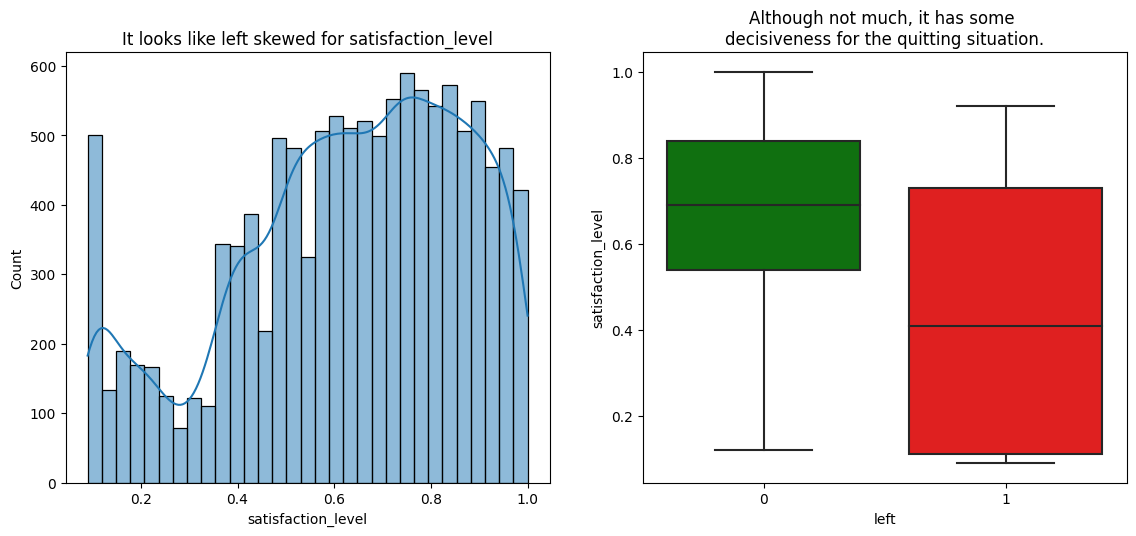

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df.satisfaction_level, kde=True, ax=ax1)
ax1.set_xlabel('satisfaction_level')
ax1.set_title('It looks like left skewed for satisfaction_level')

sns.boxplot(x=df.left, y=df.satisfaction_level, ax=ax2, palette=['green', 'red'])
ax2.set_xlabel('left')
ax2.set_ylabel('satisfaction_level')
ax2.set_title('Although not much, it has some \ndecisiveness for the quitting situation.')

plt.tight_layout(pad=3)
plt.show()

### last_evaluation

In [18]:
df.last_evaluation.describe()

count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64

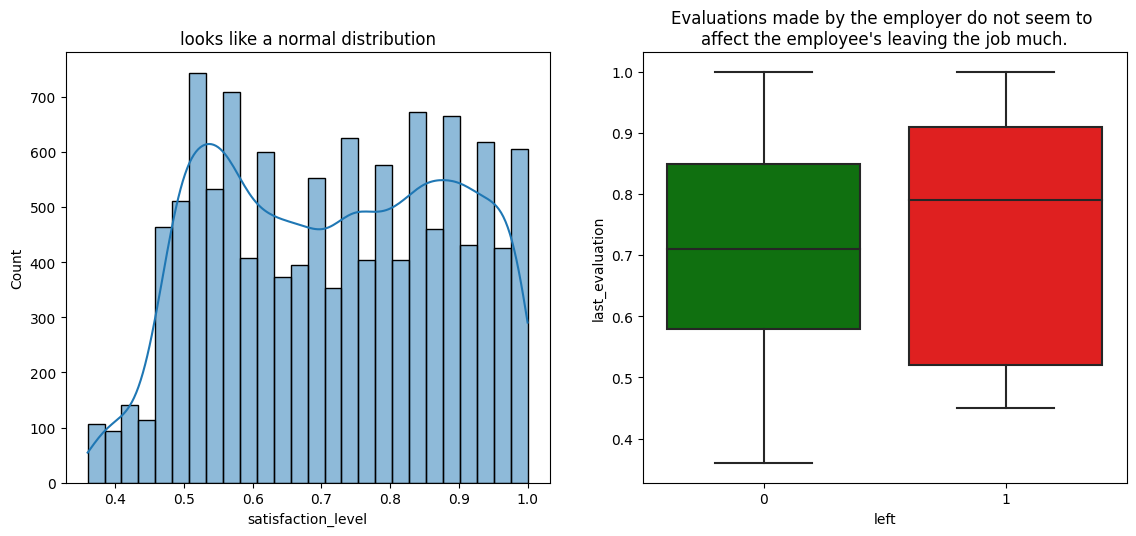

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df.last_evaluation, kde=True, ax=ax1)
ax1.set_xlabel('satisfaction_level')
ax1.set_title('looks like a normal distribution')

sns.boxplot(x=df.left, y=df.last_evaluation, ax=ax2, palette=['green', 'red'])
ax2.set_xlabel('left')
ax2.set_ylabel('last_evaluation')
ax2.set_title("Evaluations made by the employer do not seem to \naffect the employee's leaving the job much.")

plt.tight_layout(pad=3)
plt.show()

### number_project

In [20]:
df.number_project.describe()

count    11991.000000
mean         3.802852
std          1.163238
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

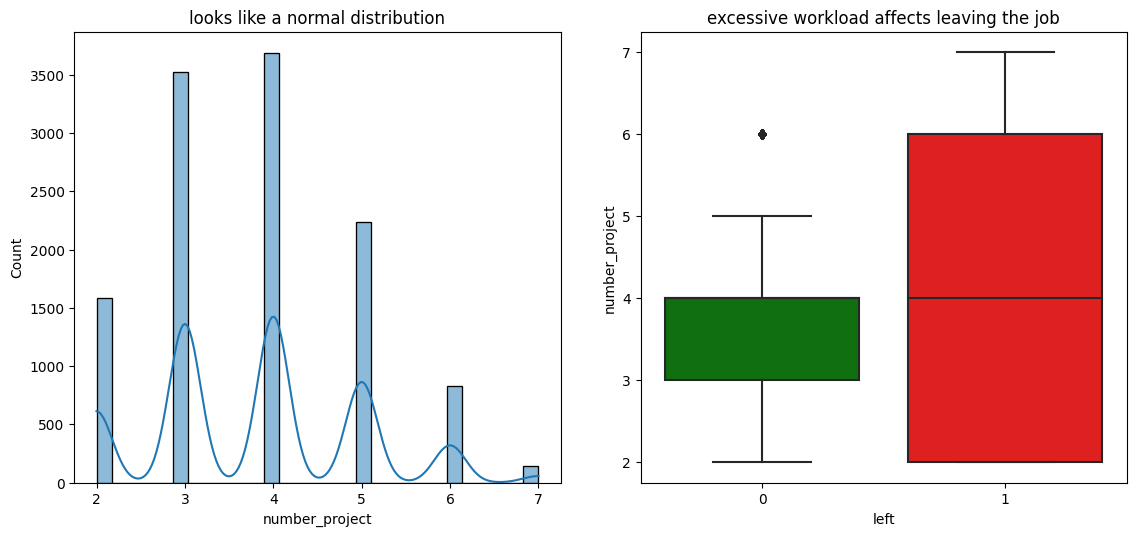

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df.number_project, kde=True, ax=ax1)
ax1.set_xlabel('number_project')
ax1.set_title('looks like a normal distribution')

sns.boxplot(x=df.left, y=df.number_project, ax=ax2, palette=['green', 'red'])
ax2.set_xlabel('left')
ax2.set_ylabel('number_project')
ax2.set_title("excessive workload affects leaving the job")

plt.tight_layout(pad=3)
plt.show()

### average_montly_hours

In [22]:
df.average_montly_hours.describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

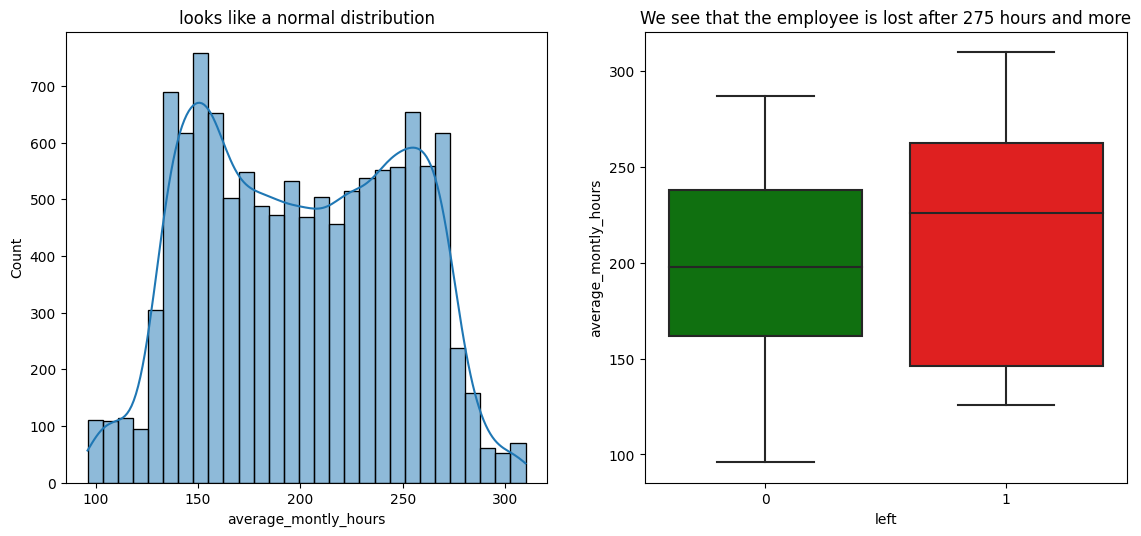

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df.average_montly_hours, kde=True, ax=ax1)
ax1.set_xlabel('average_montly_hours')
ax1.set_title('looks like a normal distribution')

sns.boxplot(x=df.left, y=df.average_montly_hours, ax=ax2, palette=['green', 'red'])
ax2.set_xlabel('left')
ax2.set_ylabel('average_montly_hours')
ax2.set_title("We see that the employee is lost after 275 hours and more")

plt.tight_layout(pad=3)
plt.show()

### time_spend_company

In [24]:
df.time_spend_company.describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

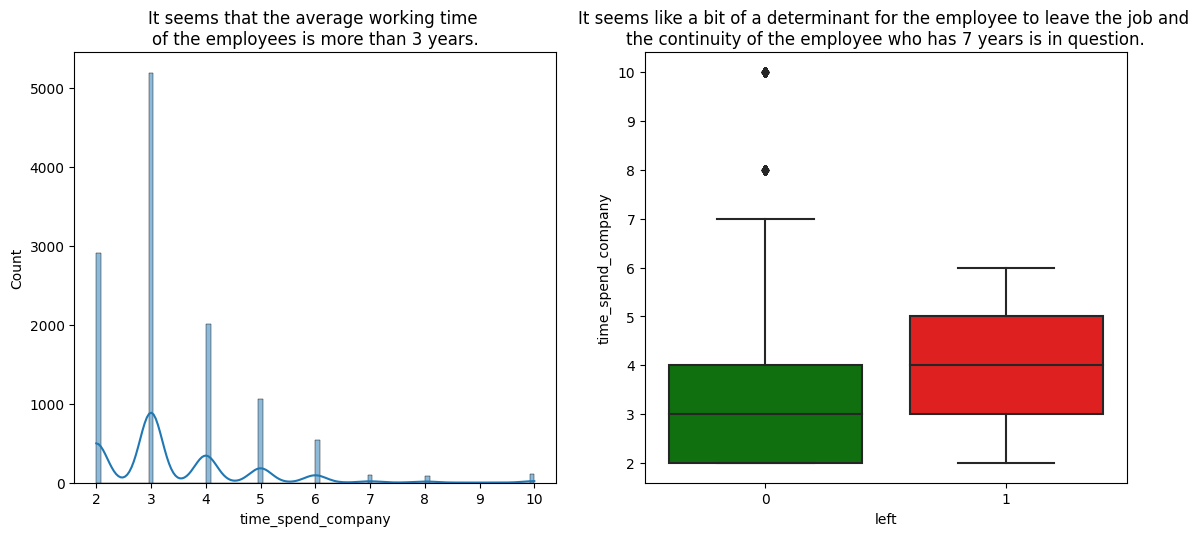

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df.time_spend_company, kde=True, ax=ax1)
ax1.set_xlabel('time_spend_company')
ax1.set_title('It seems that the average working time \nof the employees is more than 3 years.')

sns.boxplot(x=df.left, y=df.time_spend_company, ax=ax2, palette=['green', 'red'])
ax2.set_xlabel('left')
ax2.set_ylabel('time_spend_company')
ax2.set_title("It seems like a bit of a determinant for the employee to leave the job and \nthe continuity of the employee who has 7 years is in question.")

plt.tight_layout(pad=3)
plt.show()

### Work_accident

In [26]:
df.Work_accident.describe()

count    11991.000000
mean         0.154282
std          0.361234
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64

In [27]:
accident = df[df.Work_accident == 1].reset_index(drop=True)
not_accident = df[df.Work_accident == 0].reset_index(drop=True)

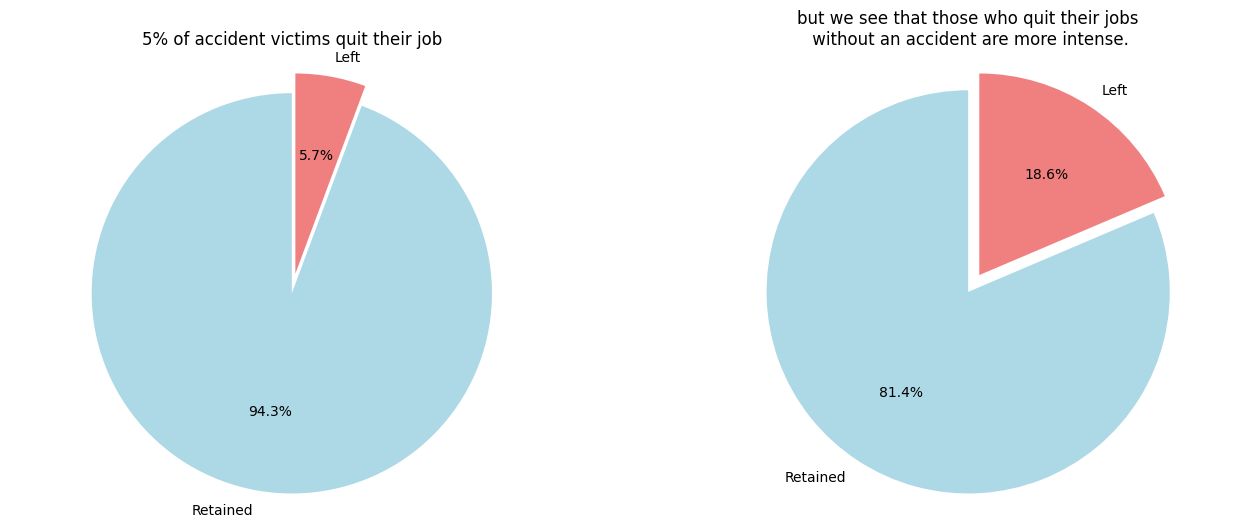

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
left_count = accident['left'].value_counts()
labels = ['Retained', 'Left']
sizes = [left_count[0], left_count[1]]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('5% of accident victims quit their job')


plt.subplot(1, 2, 2)
left_count = not_accident['left'].value_counts()
labels = ['Retained', 'Left']
sizes = [left_count[0], left_count[1]]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('but we see that those who quit their jobs\n without an accident are more intense.')
plt.show()

Conclusion: In other words, leaving the job of the person who caused the accident is not a very decisive situation.

### left

In [29]:
df.left.describe()

count    11991.000000
mean         0.166041
std          0.372133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

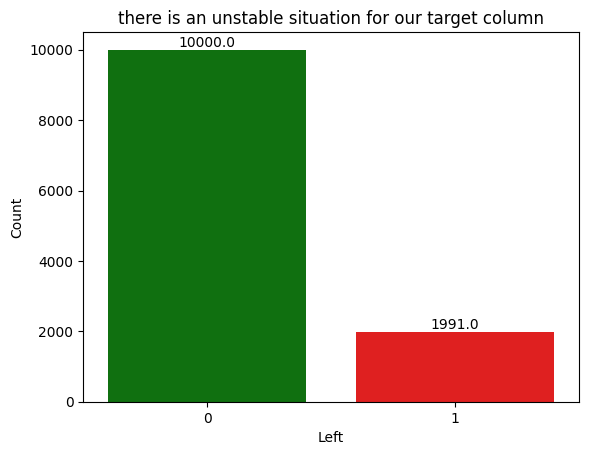

In [30]:
ax = sns.countplot(x='left', data=df, palette=['green', 'red'])
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('there is an unstable situation for our target column')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

### promotion_last_5years

In [31]:
df.promotion_last_5years.describe()

count    11991.000000
mean         0.016929
std          0.129012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_last_5years, dtype: float64

In [32]:
prom = df[df.promotion_last_5years == 1].reset_index(drop=True)
not_prom = df[df.promotion_last_5years == 0].reset_index(drop=True)

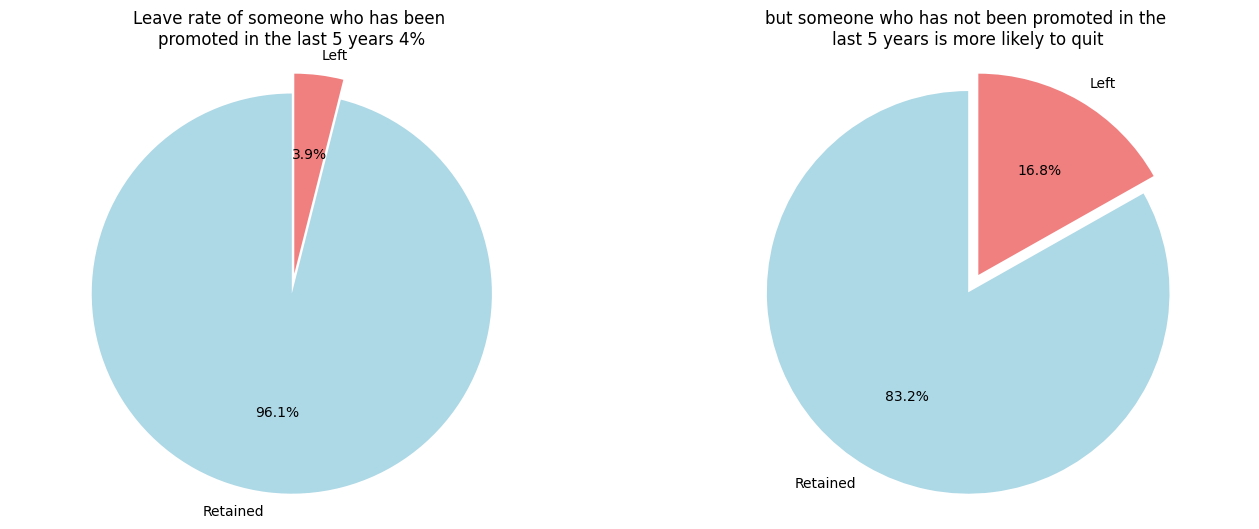

In [33]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
left_count = prom['left'].value_counts()
labels = ['Retained', 'Left']
sizes = [left_count[0], left_count[1]]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Leave rate of someone who has been \npromoted in the last 5 years 4%')


plt.subplot(1, 2, 2)
left_count = not_prom['left'].value_counts()
labels = ['Retained', 'Left']
sizes = [left_count[0], left_count[1]]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('but someone who has not been promoted in the \nlast 5 years is more likely to quit')
plt.show()

Conclusion: The status of being promoted is decisive for the employee to leave the job.

### Departments

In [34]:
df.Departments.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Departments, dtype: int64

In [35]:
dept = {'sales':'Sales', 'technical':'Technical', 'support':'Support', 'IT':'IT', 'RandD':'Research and Development', 'product_mng':'Product Manager', 
        'marketing':'Marketing', 'accounting':'Accounting', 'hr':'Human Resources', 'management':'Management'}
df.Departments = df.Departments.map(dept)
df.Departments.value_counts()

Sales                       3239
Technical                   2244
Support                     1821
IT                           976
Research and Development     694
Product Manager              686
Marketing                    673
Accounting                   621
Human Resources              601
Management                   436
Name: Departments, dtype: int64

In [36]:
from ipywidgets import interact

def vis_outlier(Department):
    x = df[df.Departments == Department].reset_index(drop=True)

    left_count = x['left'].value_counts()
    labels = ['Retained', 'Left']
    sizes = [left_count[0], left_count[1]]
    colors = ['lightblue', 'lightcoral']
    explode = (0.1, 0)  

    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  
    plt.title(Department)

    plt.subplot(1, 2, 2)
    ax = sns.countplot(y=df['Departments'], order=df['Departments'].value_counts().index)
    ax.set_xlabel('Count')
    ax.set_ylabel('Departments')

    for i, v in enumerate(df['Departments'].value_counts().sort_values(ascending=False)):
        ax.text(v + 10, i, str(v), color='black', va='center')

    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

cols = df.Departments.unique()

interact(vis_outlier, Department=cols);

interactive(children=(Dropdown(description='Department', options=('Sales', 'Accounting', 'Human Resources', 'T…

Conclusion: In general, turnover rate is 17% for each department, so there is no unbalanced situation.

### salary

In [37]:
df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

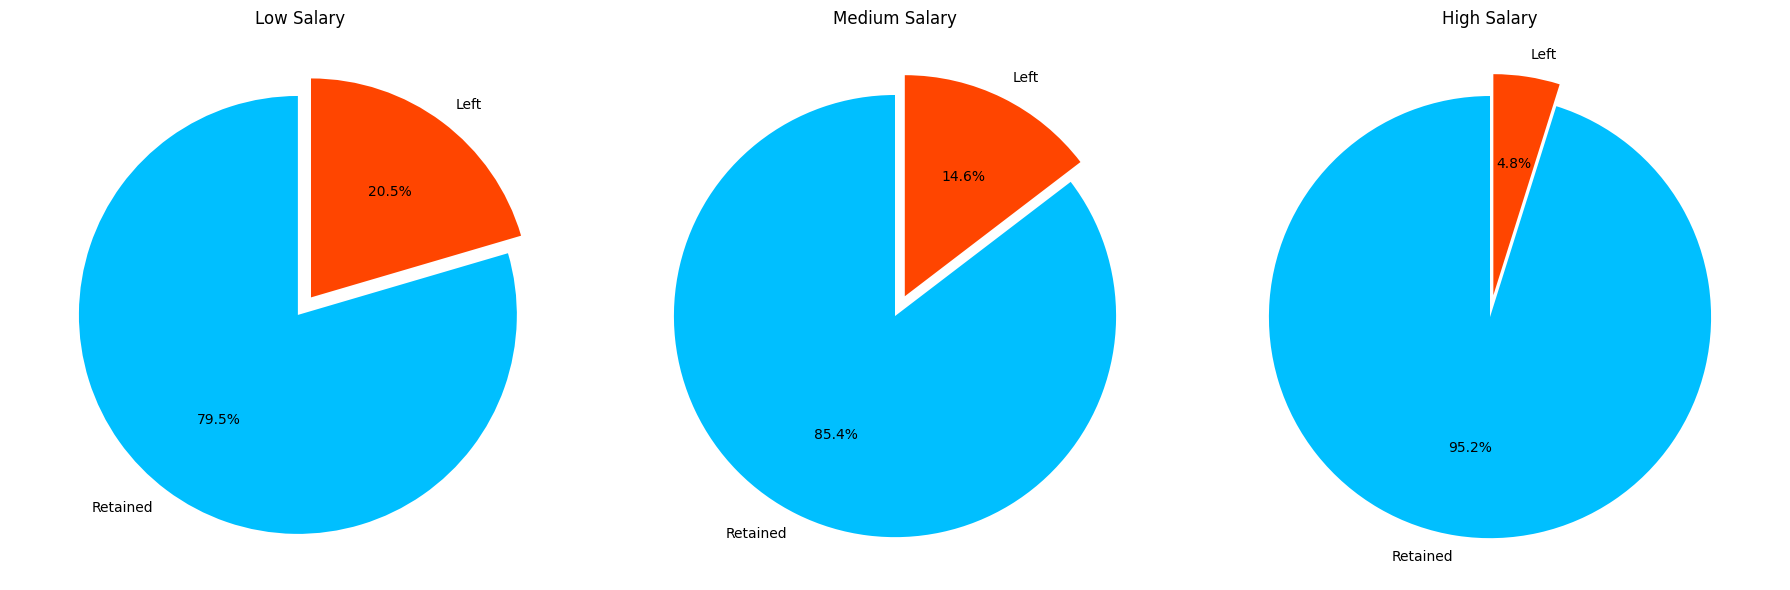

In [38]:
low = df[df.salary == 'low'].reset_index(drop=True)
medium = df[df.salary == 'medium'].reset_index(drop=True)
high = df[df.salary == 'high'].reset_index(drop=True)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

left_count = low['left'].value_counts()
labels = ['Retained', 'Left']
sizes = [left_count[0], left_count[1]]
colors = ['deepskyblue', 'orangered']
explode = (0.1, 0)

axs[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Low Salary')
axs[0].axis('equal')

left_count = medium['left'].value_counts()
sizes = [left_count[0], left_count[1]]

axs[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Medium Salary')
axs[1].axis('equal')

left_count = high['left'].value_counts()
sizes = [left_count[0], left_count[1]]

axs[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[2].set_title('High Salary')
axs[2].axis('equal')

plt.tight_layout()
plt.show()

Conclusion: While there is a close relationship between low and medium salary, the employment status of people with high salary differs.

## 4. Cluster Analysis

In [39]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,low
1,0.80,0.86,5,262,6,0,1,0,Sales,medium
2,0.11,0.88,7,272,4,0,1,0,Sales,medium
3,0.72,0.87,5,223,5,0,1,0,Sales,low
4,0.37,0.52,2,159,3,0,1,0,Sales,low


In [40]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [41]:
enc_ordinal = OrdinalEncoder()
categorical = ['Departments', 'salary']  # Specify the column names containing categorical data
column_trans = make_column_transformer((enc_ordinal, categorical),
                                        verbose_feature_names_out=False)

In [42]:
operations = [("encode", column_trans)]
pmodel = Pipeline(steps=operations).set_output(transform='pandas')
df_cluster = pmodel.fit_transform(df)
df_cluster = df.iloc[:,:8].join(df_cluster)

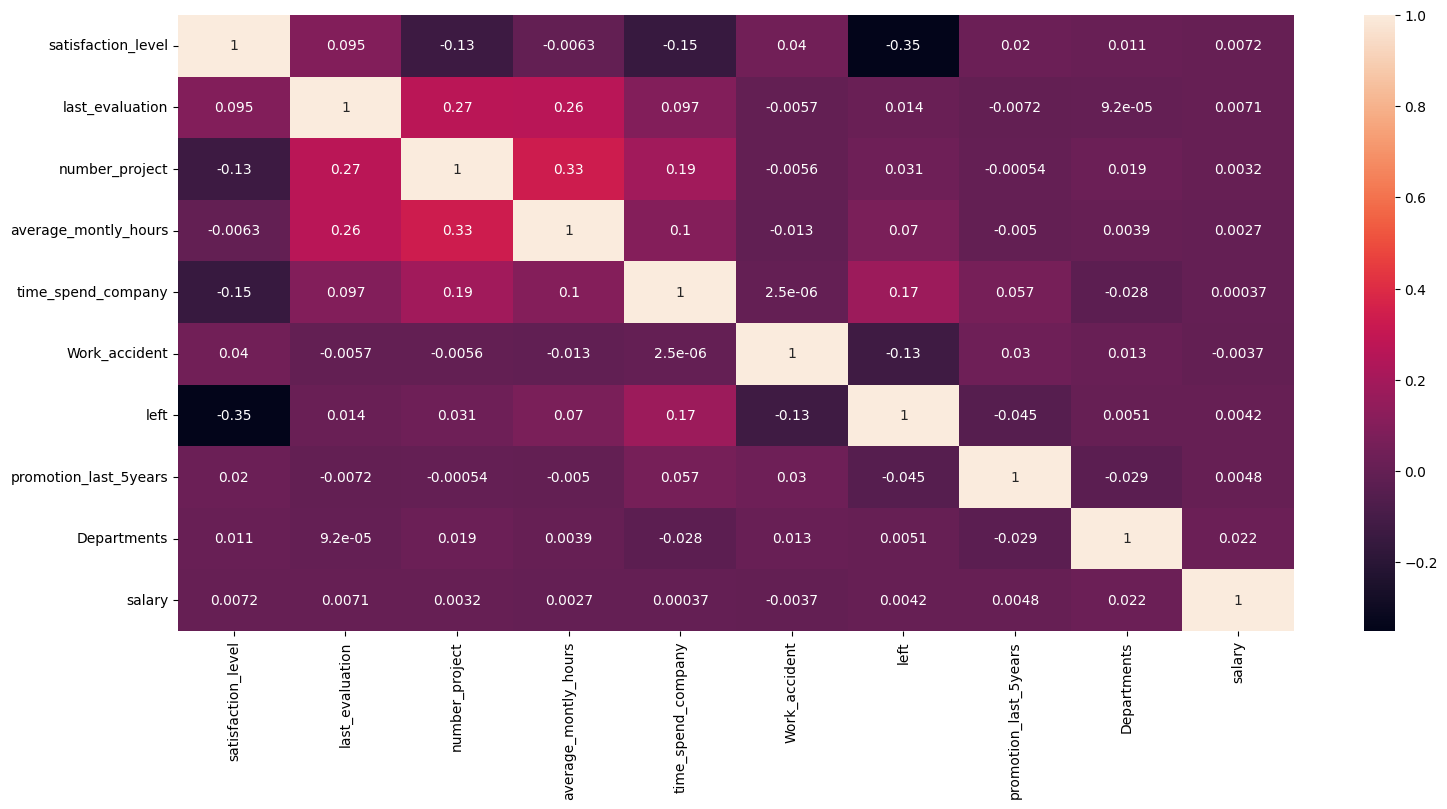

In [43]:
plt.figure(figsize=(18,8))
sns.heatmap(df_cluster.corr(), annot=True)
plt.show()

In [44]:
hopkins(df_cluster, df_cluster.shape[0])

0.31333821177340104

### Elbow Method

In [45]:
from sklearn.cluster import KMeans
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k)
    model.fit(df_cluster)
    ssd.append(model.inertia_)
    
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)

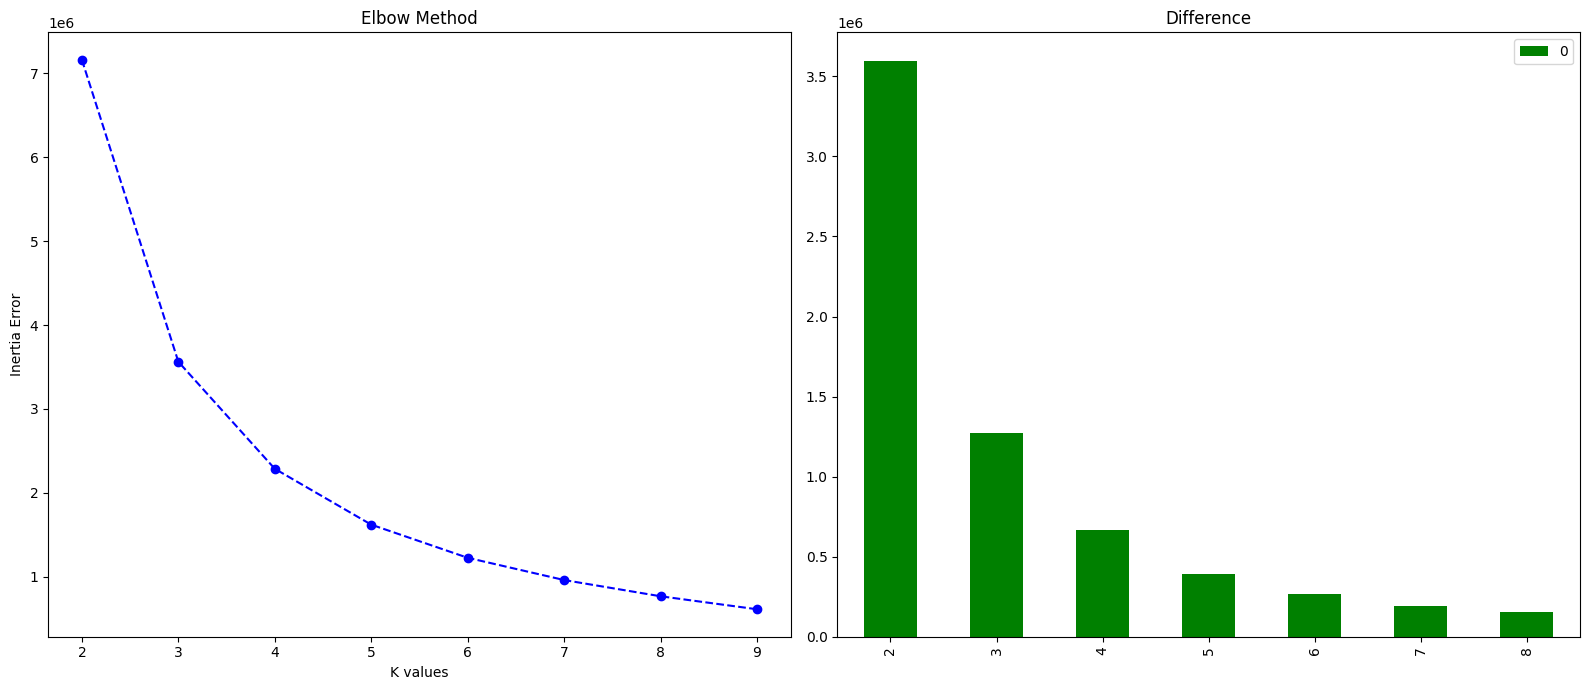

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].plot(K, ssd, "bo--")
axes[0].set_xlabel("K values")
axes[0].set_ylabel("Inertia Error")
axes[0].set_title("Elbow Method")

df_diff[1:].plot(kind='bar', ax=axes[1], color=['green'])
axes[1].set_title("Difference")

plt.tight_layout()
plt.show()

### Silhouette Analysis

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
range_n_clusters = range(2,9)
n_cluster = []
sil_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_cluster)
    cluster_labels = kmeans.labels_
    n_cluster.append(num_clusters)
    sil_avg.append(silhouette_score(df_cluster, cluster_labels))

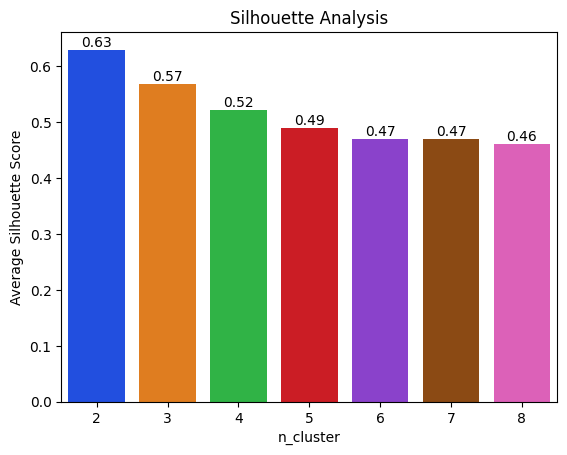

In [49]:
ax = sns.barplot(x=n_cluster, y=sil_avg, palette="bright")

for i in range(len(n_cluster)):
    ax.text((i), sil_avg[i], str(round(sil_avg[i], 2)), ha='center', va='bottom')
plt.xlabel('n_cluster')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')

plt.show()

In [50]:
from yellowbrick.cluster import SilhouetteVisualizer

def vis_outlier(n_cluster):
    model3 = KMeans(n_clusters=n_cluster, random_state=42)
    visualizer = SilhouetteVisualizer(model3)
    visualizer.fit(df_cluster) 
    visualizer.poof()
nums = [2, 3, 4, 5, 6, 7, 8]
interact(vis_outlier, n_cluster=nums);

interactive(children=(Dropdown(description='n_cluster', options=(2, 3, 4, 5, 6, 7, 8), value=2), Output()), _d…

### Model

In [51]:
from sklearn.metrics import adjusted_rand_score

In [52]:
kmean_model = KMeans(n_clusters=2)
kmean_model.fit(df_cluster)

KMeans(n_clusters=2)

In [53]:
clusters = kmean_model.labels_

In [54]:
df_cluster['predict'] = clusters

In [55]:
adjusted_rand_score(df_cluster.left, df_cluster.predict)

0.0022179681292398205

##  Predictive Model Building

### Preprocessing

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop('left', axis=1)
y = df['left']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

### Classification Algorithms
 - Try at least 4 ML/DL algorithms. 

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

#### Logistic Model

In [71]:
from sklearn.linear_model import LogisticRegression

Logistic regression is a popular supervised machine learning algorithm used for binary classification tasks. It is a statistical model that predicts the probability of an instance belonging to a particular class.

The main idea behind logistic regression is to model the relationship between the input features (independent variables) and the binary target variable (dependent variable) using a logistic function. The logistic function, also known as the sigmoid function, maps any real-valued number to a value between 0 and 1, representing the probability of the instance belonging to the positive class.

The logistic regression model assumes that the log-odds of the target variable being in the positive class is a linear combination of the input features. The model calculates the weighted sum of the input features, applies the logistic function to it, and produces the probability of the positive class.

During the training phase, logistic regression optimizes the model parameters using optimization techniques like maximum likelihood estimation or gradient descent. The goal is to find the parameter values that maximize the likelihood of the observed data given the model.

Once the model is trained, it can be used to predict the class labels of new instances by comparing the predicted probabilities to a predefined threshold. If the predicted probability is above the threshold, the instance is classified as the positive class; otherwise, it is classified as the negative class.

Logistic regression has several advantages, including simplicity, interpretability, and efficiency. It works well with both linearly separable and non-linearly separable data, and it can handle categorical and continuous input features. However, logistic regression assumes a linear relationship between the features and the log-odds, and it may not perform well in cases where the relationship is highly non-linear.

The main parameters of logistic regression are as follows:

1) Penalty: Logistic regression can apply regularization to the model to prevent overfitting. The penalty parameter determines the type and strength of regularization. There are two commonly used penalties: L1 regularization (Lasso) and L2 regularization (Ridge). The choice of penalty depends on the problem and the nature of the data.

2) C: The inverse of the regularization strength is represented by the parameter C. A smaller value of C indicates stronger regularization, while a larger value of C indicates weaker regularization. It controls the trade-off between fitting the training data well and preventing overfitting.

3) Solver: Logistic regression models can be solved using different algorithms or solvers. The solver parameter determines the optimization algorithm to use for finding the optimal parameter values. Some popular solver options include 'liblinear', 'lbfgs', 'newton-cg', and 'sag'. The choice of solver depends on the size of the dataset and the computational efficiency required.

4) Maximum Iterations: The maximum number of iterations is the maximum number of times the solver iterates to converge on the optimal parameter values. It is important to set a sufficiently large value for this parameter to ensure convergence of the optimization algorithm.

5) Class Weight: In cases where the classes are imbalanced, you can assign different weights to each class to give more importance to the minority class. The class_weight parameter allows you to specify the weights for each class. This can help improve the performance of the model on the minority class.

##### Model Building

In [96]:
# prepare the features for encoding
cat_onehot = ['Departments'] # onehot encoding for departments feature (no hierarchy between various departments)
cat_ordinal = ['salary'] # ordinal encoding for salary bec of hierarchical order betweenn the labels

cat_for_salary = ["low", "medium", "high"] # define the order among different salary groups 

In [97]:
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_salary])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [74]:
# operation order for pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("model", LogisticRegression(C=1, max_iter=1000, class_weight="balanced", random_state=101))]

log_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# Fit the pipeline on the training data
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=101))])

##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [75]:
print("LOG MODEL")
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

LOG MODEL
Test_Set
[[1544  457]
 [  62  336]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399


Train_Set
[[6073 1926]
 [ 279 1314]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.82      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.86      0.77      0.80      9592



##### Cross Validate

In [76]:
# check overfitting with cv
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("model", LogisticRegression(C=1, max_iter=1000, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations).set_output(transform="pandas")

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring = scoring, 
                        cv = 5, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 6))
df_scores.mean()[2:]

# no overfitting but poor scores

test_accuracy      0.768558
train_accuracy     0.769495
test_f1            0.540430
train_f1           0.542281
test_recall        0.819207
train_recall       0.822191
test_precision     0.403328
train_precision    0.404558
dtype: float64

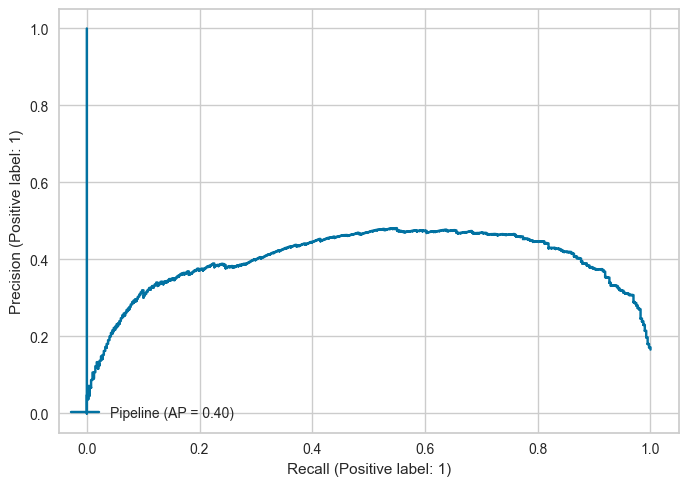

In [79]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, matthews_corrcoef

PrecisionRecallDisplay.from_estimator(log_pipe, 
                                      X_test, 
                                      y_test);
# overall performance of the log model is quite low, it can separate the classes with only a 40% performance

#####  Prediction

In [86]:
# save the scores to compare in the end with the scores of other models
y_pred = log_pipe.predict(X_test)
y_pred_proba= log_pipe.predict_proba(X_test)[:,1]

log_AP = average_precision_score(y_test, y_pred_proba)
log_rec = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test,y_pred)
log_matthews =  matthews_corrcoef(y_test, y_pred)
log_time = measure_prediction_time(log_pipe,X_test)

log_AP,log_rec,log_f1,log_matthews,log_time

(0.396247497509286,
 0.8442211055276382,
 0.5642317380352645,
 0.4869902814700124,
 0.007730245590209961)

What is Matthews Correlation Coefficient and why we use it for this data?

The Matthews Correlation Coefficient (MCC) is a measure of the quality of binary classifications, particularly in imbalanced datasets. It takes into account true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) to calculate a single score that represents the overall performance of a binary classifier.

MCC ranges from -1 to 1, where a value of 1 indicates a perfect classifier, 0 indicates a random classifier, and -1 indicates a completely incorrect classifier. MCC considers all four classification results, unlike some other metrics that focus only on a specific aspect, such as accuracy or precision.

MCC is particularly useful in imbalanced datasets because it balances the effect of true negatives against false negatives. In imbalanced datasets, where the negative class (majority class) significantly outweighs the positive class (minority class), traditional metrics like accuracy can be misleading. For example, a classifier that always predicts the negative class will have a high accuracy but fails to capture the minority class correctly. MCC, on the other hand, takes into account the true negatives and false negatives and provides a more reliable evaluation of classifier performance.

In summary, MCC is a useful metric for evaluating the performance of binary classifiers, especially in imbalanced datasets, as it provides a balanced assessment of the classifier's ability to handle both positive and negative classes.

Result: LOGISTIC REG model:

What are the main measures in Confusion Matrix for this data:

True Negative (TN): The model correctly predicted that an employee continues to work (0) when they actually continue to work.
False Positive (FP): The model incorrectly predicted that an employee has churned (1) when they actually continue to work.
False Negative (FN): The model incorrectly predicted that an employee continues to work when they have actually churned.
True Positive (TP): The model correctly predicted that an employee has churned.
Based on the results otained from the vanilla model above, the logistic regression model shows lower precision, recall, and F1-score. This indicates that the model has more difficulty correctly identifying churned employees (class 1). The precision for class 1 is particularly low, meaning there is a higher rate of false positive predictions.

The accuracy of the model is moderate, suggesting that it provides reasonably accurate predictions overall. In addition, the lower recall for class 0 indicates a higher rate of false negatives, meaning some employees who have churned are not correctly identified by the model.

#### KNN Model

In [87]:
from sklearn.neighbors import KNeighborsClassifier

K-Nearest Neighbors (KNN) is a simple yet powerful supervised learning algorithm used for both classification and regression tasks.

Key Parameters of KNN:

n_neighbors: The number of neighbors to consider when making predictions. It is an integer value and should be carefully chosen to balance between overfitting and underfitting. A smaller value tends to increase model complexity and may lead to overfitting, while a larger value may increase bias and result in underfitting.

weights: The weight function used in prediction. It can be set to 'uniform' (equal weights) or 'distance' (weights inversely proportional to distance). The choice of weights can have an impact on the performance of the algorithm.

metric : The distance metric used to measure the similarity between instances. Common options include 'euclidean' (Euclidean distance), 'manhattan' (Manhattan distance), and 'cosine' (cosine similarity). The choice of metric depends on the nature of the data and the problem at hand.

It's important to note that KNN is sensitive to the scale and distribution of the features, so it's often beneficial to perform feature scaling before applying KNN.

##### Model Building

In [98]:
# operation order for pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("knn", KNeighborsClassifier(n_neighbors=5))]

knn_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# Fit the pipeline on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [99]:
# check the scores
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[1931   70]
 [  43  355]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.89      0.86       398

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[7803  196]
 [ 189 1404]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.88      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



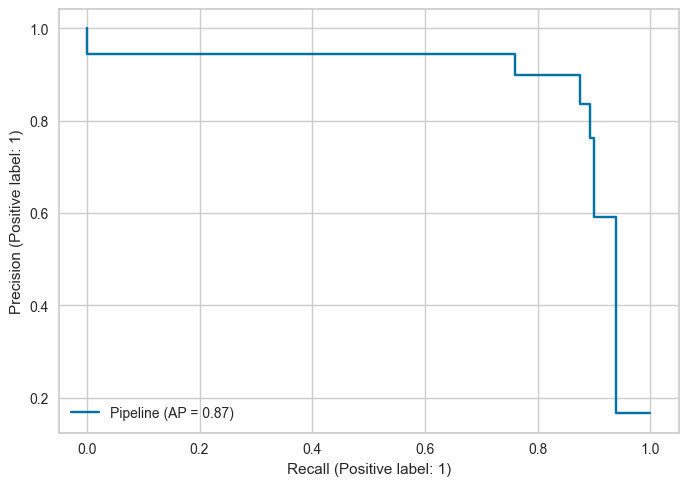

In [100]:
from sklearn.metrics import PrecisionRecallDisplay , average_precision_score
PrecisionRecallDisplay.from_estimator(knn_pipe, X_test, y_test);

#####  Prediction

In [93]:
# save the scores to compare in the end with the scores of other models
y_pred = knn_pipe.predict(X_test)
y_pred_proba= knn_pipe.predict_proba(X_test)[:,1]

knn_AP = average_precision_score(y_test, y_pred_proba)
knn_rec = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test,y_pred)
knn_matthews =  matthews_corrcoef(y_test, y_pred)
knn_time = measure_prediction_time(knn_pipe,X_test)

knn_AP,knn_rec,knn_f1,knn_matthews,knn_time

(0.8742811357834483,
 0.8919597989949749,
 0.8626974483596598,
 0.8349613151335263,
 0.10149910449981689)

RESULT for KNN

Based on the scores above, the KNN algorithm consistently performed well and yielded relatively higher scores for each metric. When considering the recall score for this imbalanced data, it reached 89, while the precision and F1 scores were also higher compared to logistic regression. However, as demonstrated below, tree-based algorithms outperformed KNN and achieved higher scores for this particular dataset. Therefore, we will keep the KNN model with k=5 (the optimal number of neighbors) as is and will not conduct a grid search for it.

#### Support Vector Machines (SVC) Model

In [101]:
from sklearn.svm import SVC

Support Vector Machines (SVM) is a popular supervised machine learning algorithm used for both classification and regression tasks. SVM is a binary classifier that aims to find an optimal hyperplane that separates data points belonging to different classes in the feature space.

The basic idea behind SVM is to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. The hyperplane is chosen in such a way that it maximally separates the classes and minimizes the generalization error. The data points that lie closest to the hyperplane are called support vectors, and they play a crucial role in defining the decision boundary.

SVM can handle both linearly separable and non-linearly separable data by using various kernel functions. The kernel function transforms the input features into a higher-dimensional space, where the data may become linearly separable. Commonly used kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

The training process of SVM involves solving an optimization problem to find the optimal hyperplane. This problem aims to minimize the classification error while maximizing the margin. SVM also introduces the concept of regularization to handle overfitting by adding a penalty term that balances the margin and the classification error.

Once trained, SVM can be used to predict the class labels of unseen data points. It assigns new data points to the class on the basis of which side of the decision boundary they fall.

SVM has several advantages, such as effective in high-dimensional spaces, robust against overfitting, and ability to handle both linear and non-linear data. However, SVM may suffer from scalability issues with large datasets and requires careful selection of hyperparameters for optimal performance.

The main parameters of Support Vector Machines (SVM) are as follows:

1) Kernel: SVM can use different types of kernels to transform the data into a higher-dimensional space. The kernel parameter determines the type of kernel to be used. Some commonly used kernels are linear, polynomial, radial basis function (RBF), and sigmoid. The choice of kernel depends on the nature of the data and the problem being solved.

2) C: The parameter C in SVM controls the trade-off between achieving a low training error and a low-margin decision boundary. A smaller value of C allows for a larger margin but may result in more training errors, while a larger value of C aims to minimize the training errors at the expense of a narrower margin. It determines the level of misclassification that is acceptable.

3) Gamma: Gamma is a parameter used in non-linear kernels (such as RBF) and controls the influence of each training example. A low value of gamma indicates a larger influence radius, resulting in a smoother decision boundary, while a high value of gamma indicates a smaller influence radius, resulting in a more complex and wiggly decision boundary.

4) Class Weight: Similar to logistic regression, SVM can also handle imbalanced datasets by assigning different weights to each class. The class_weight parameter allows you to specify the weights for each class. It can be useful when the classes are imbalanced, and you want to give more importance to the minority class.

5) Kernel Coefficient (Degree): This parameter is used in polynomial kernels and determines the degree of the polynomial function used to map the data into higher-dimensional space. It controls the flexibility of the model to capture non-linear relationships in the data.

##### Model Building

In [102]:
# operation order for pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]

SVC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# Fit the pipeline on the training data
SVC_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(class_weight='balanced', max_iter=1000,
                     random_state=101))])

##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [103]:
# check the scores
eval_metric(SVC_pipe, X_train, y_train, X_test, y_test)
# poor recall for 0 class and precision for  1 class

Test_Set
[[ 479 1522]
 [   5  393]]
              precision    recall  f1-score   support

           0       0.99      0.24      0.39      2001
           1       0.21      0.99      0.34       398

    accuracy                           0.36      2399
   macro avg       0.60      0.61      0.36      2399
weighted avg       0.86      0.36      0.38      2399


Train_Set
[[1759 6240]
 [  10 1583]]
              precision    recall  f1-score   support

           0       0.99      0.22      0.36      7999
           1       0.20      0.99      0.34      1593

    accuracy                           0.35      9592
   macro avg       0.60      0.61      0.35      9592
weighted avg       0.86      0.35      0.36      9592



##### Cross Validate

In [104]:
# check overfitting
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]
SVC_pipe = Pipeline(steps=operations)

scores = cross_validate(SVC_pipe, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

# too low precision scores

test_accuracy      0.358938
train_accuracy     0.355272
test_precision     0.205487
train_precision    0.204763
test_recall        0.994349
train_recall       0.997018
test_f1            0.340491
train_f1           0.339678
dtype: float64

##### Gridsearch

In [105]:
from sklearn.model_selection import GridSearchCV

What is Gridsearch and why is it important?

Grid search is a hyperparameter optimization technique used in machine learning to find the best combination of hyperparameter values for a given model. Hyperparameters are parameters that are not learned from the data but are set before training the model, such as the learning rate, regularization parameter, or number of hidden units in a neural network.

Grid search involves defining a grid of possible values for each hyperparameter and exhaustively searching through all possible combinations. For each combination, the model is trained and evaluated using a specified evaluation metric, such as accuracy or mean squared error. The combination of hyperparameter values that achieves the best performance on the evaluation metric is selected as the optimal set of hyperparameters.

In [106]:
# define the param-grid
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3], # float values can be given in addition to scale and auto 
              'SVC__kernel': ['rbf', 'linear'], # try rbf and linear
              'SVC__class_weight': ["balanced", None]}

In [107]:
%%time
# build the model
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(SVC_pipe_model, 
                              param_grid, 
                              scoring="recall", # recall in an imbalanced data
                              cv=5, 
                              return_train_score=True)

CPU times: total: 0 ns
Wall time: 0 ns


In [108]:
%%time
svm_model_grid.fit(X_train, y_train)

CPU times: total: 6min 14s
Wall time: 8min 41s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=1000,
                                            random_state=101))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall')

In [109]:
svm_model_grid.best_estimator_
# C_0.001, kernel default rbf

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=0.001, class_weight='balanced', max_iter=1000,
                     random_state=101))])

In [110]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     1.0
mean_train_score    1.0
Name: 0, dtype: object

In [111]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

#  model predicted all samples as belonging to the 1 class, resulting in a recall score of 1 for the 
# 1 class and a recall score of 0 for the 0 class. 

Test_Set
[[   0 2001]
 [   0  398]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2001
           1       0.17      1.00      0.28       398

    accuracy                           0.17      2399
   macro avg       0.08      0.50      0.14      2399
weighted avg       0.03      0.17      0.05      2399


Train_Set
[[   0 7999]
 [   0 1593]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7999
           1       0.17      1.00      0.28      1593

    accuracy                           0.17      9592
   macro avg       0.08      0.50      0.14      9592
weighted avg       0.03      0.17      0.05      9592



In [112]:
%%time
# build the model by changing recall with f1-score this time. We aim to improve the precision scores too
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]

SVC_pipe_model_f1 = Pipeline(steps=operations)

svm_model_grid_f1 = GridSearchCV(SVC_pipe_model_f1, 
                              param_grid, 
                              scoring="f1",
                              cv=5, 
                              return_train_score=True)

CPU times: total: 0 ns
Wall time: 0 ns


In [113]:
%%time
svm_model_grid_f1.fit(X_train, y_train)

CPU times: total: 6min 14s
Wall time: 9min 5s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=1000,
                                            random_state=101))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1')

In [114]:
svm_model_grid_f1.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC', SVC(C=0.1, max_iter=1000, random_state=101))])

In [115]:
pd.DataFrame(svm_model_grid_f1.cv_results_).loc[svm_model_grid_f1.best_index_, ["mean_test_score", "mean_train_score"]]
#overfiting check

mean_test_score     0.634027
mean_train_score    0.654503
Name: 56, dtype: object

In [116]:
eval_metric(svm_model_grid_f1, X_train, y_train, X_test, y_test)

Test_Set
[[1608  393]
 [  82  316]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2001
           1       0.45      0.79      0.57       398

    accuracy                           0.80      2399
   macro avg       0.70      0.80      0.72      2399
weighted avg       0.87      0.80      0.82      2399


Train_Set
[[6369 1630]
 [ 306 1287]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7999
           1       0.44      0.81      0.57      1593

    accuracy                           0.80      9592
   macro avg       0.70      0.80      0.72      9592
weighted avg       0.87      0.80      0.82      9592



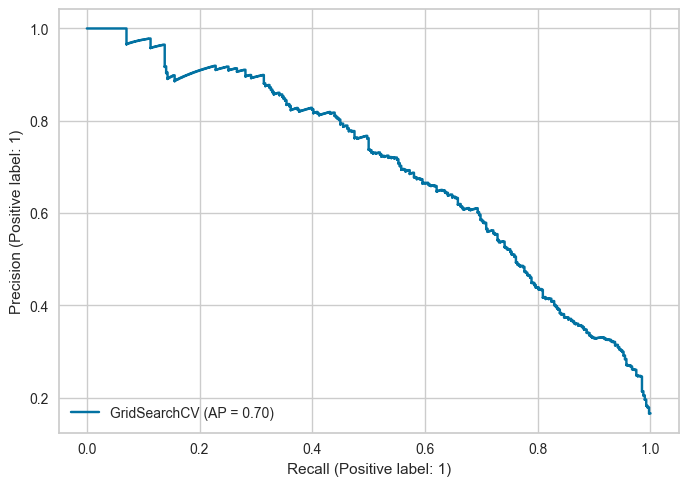

In [117]:
from sklearn.metrics import PrecisionRecallDisplay , average_precision_score
PrecisionRecallDisplay.from_estimator(svm_model_grid_f1, X_test, y_test);

#####  Prediction

In [118]:
# save the metric scores to comare with other models in the end
y_pred = svm_model_grid_f1.predict(X_test)
decision_function= svm_model_grid_f1.decision_function(X_test)

SVM_AP = average_precision_score(y_test, decision_function)
SVM_rec = recall_score(y_test, y_pred)
SVM_f1 = f1_score(y_test,y_pred)
SVM_matthews =  matthews_corrcoef(y_test, y_pred)
SVM_time =  measure_prediction_time(svm_model_grid_f1,X_test)
SVM_AP, SVM_rec, SVM_f1, SVM_matthews, SVM_time

(0.699034621657618,
 0.7939698492462312,
 0.5709123757904245,
 0.48717610590661103,
 0.4812288761138916)

Result for SVM:

The scores of the SVM are lower than the other algorithms. In particular, precision scores were low for both classes. After tuning the hyperparameters via Gridsearch, the precison and f1 scores increased significantly, however as it can be seen below, other algorithms such as cat boost or xgboost perform far better than log reg or svm.

#### Random Forest Model

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. How does Random Forest work:

Random Subsampling: Random Forest randomly selects a subset of the dataset (with replacement) to create a new training set for each decision tree in the ensemble. This process is known as bootstrapping.
Decision Tree Training: Each decision tree in the Random Forest is trained on the bootstrapped training set using a random subset of features. This randomness helps introduce diversity among the trees.
Voting: Once all the decision trees are trained, they individually make predictions on unseen data. In classification problems, the final prediction is determined by majority voting, where each tree's prediction is considered, and the class with the most votes is selected. For regression problems, the final prediction is usually the average of the individual tree predictions.
Main advantages of Random Forests:

Reduced Overfitting: The ensemble of decision trees reduces the risk of overfitting compared to a single decision tree, as individual trees are prone to overfitting the training data.
Feature Importance: Random Forests provide a measure of feature importance based on how much each feature contributes to the overall performance of the ensemble.
Robustness: Random Forests are generally robust to outliers and noisy data due to the aggregation of multiple decision trees.
Efficiency: The training process of Random Forests can be parallelized, making it efficient for large datasets.
Non-linear Relationships: Random Forests can capture non-linear relationships between features and target variables.
It's worth noting that Random Forests have some limitations as well, such as decreased interpretability compared to individual decision trees and increased computational complexity with a large number of trees.

Key parameters of RF

n_estimators: This parameter determines the number of decision trees in the forest. Increasing the number of trees generally improves performance, but it also increases computation time.
max_depth: It controls the maximum depth of each decision tree in the forest. Limiting the depth helps to prevent overfitting. Setting it to a lower value reduces complexity and can help improve generalization.
min_samples_split: This parameter sets the minimum number of samples required to split an internal node. Increasing this value can prevent the model from creating small leaf nodes and can be used to control overfitting.
min_samples_leaf: It sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, increasing this value can help prevent overfitting by avoiding the creation of small leaf nodes.
max_features: This parameter controls the number of features to consider when looking for the best split. The value can be an integer, float, or string. The "sqrt" option uses the square root of the total number of features, while "log2" uses the logarithm base 2 of the total number of features. Choosing a smaller value reduces the correlation between trees and increases randomness.
bootstrap : It determines whether bootstrap samples are used when building decision trees. By default, it is set to True, which means that bootstrap samples are used. Setting it to False would train each decision tree on the entire dataset.
class_weight: It allows you to assign different weights to different classes. This can be useful if the dataset is imbalanced, as it helps the model to pay more attention to the minority class.

##### Model Building

In [120]:
# categorical features for encoding - ordinal encoder with better scores for RF
cat_ordinal = ['salary','Departments']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value'
                             ,unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [121]:
operations_rf = [("OrdinalEncoder", column_trans),
                  ("RF_model", RandomForestClassifier(random_state=100 ))]

rf_pipe = Pipeline(steps=operations_rf)


params_pipe_rf = {
    'RF_model__sample_weight': classes_weights,
    # 'XGB_model__early_stopping_rounds': 10,   # Number of rounds with no improvement before stopping
    # 'XGB_model__eval_metric':'logloss',      # Evaluation metric for early stopping
    # 'XGB_model__eval_set':[(X_test, y_test)]
}

# Fit the pipeline on the training data
rf_pipe.fit(X_train, y_train,**params_pipe_rf)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'Departments'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=100))])

##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [122]:
print("RF MODEL")
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

RF MODEL
Test_Set
[[1998    3]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [123]:
# Define the operations in the pipeline
operations_rf = [
    ("OrdinalEncoder", OrdinalEncoder()),
    ("RF_model", RandomForestClassifier (random_state=101))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_rf)

# Defining fit params for cross-validation
rf_pipe_params = {'RF_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=rf_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

# overfitting

Mean cross-validation scores:
test_accuracy      0.982798
train_accuracy     1.000000
test_f1            0.945889
train_f1           1.000000
test_recall        0.906467
train_recall       1.000000
test_precision     0.989047
train_precision    1.000000
dtype: float64


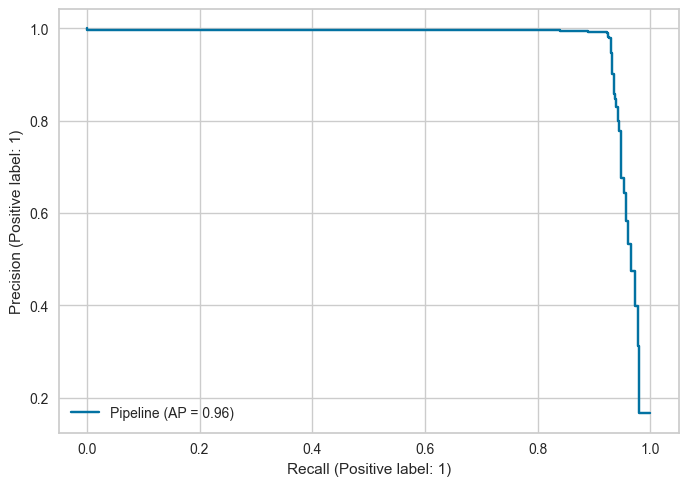

In [124]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(rf_pipe,
                                      X_test,
                                      y_test);

How can we deal with overfitting in tree based models, RF in particular

As seen above, scores for train data are 1.00 and for test data 0.92-0.93 which indicates a clear overfitting. Therefore we should tüne some of the hyperparameters to avoid overfitting. In case of tree based models, the most important hyperparameter to deal with overfitting is max_depth which cuts the split of the trees at a given point (3 in our case). Another hyperparameter to avoid overfitting is n_estimators. We will increase its from 100 (default value) to 150 to enable the model learn better.

In [125]:
# rebuild the model
operations_rf = [("OrdinalEncoder", column_trans),
                  ("RF_model", RandomForestClassifier(random_state=100, max_depth=3, n_estimators=150))]

rf_pipe = Pipeline(steps=operations_rf)


params_pipe_rf = {
    'RF_model__sample_weight': classes_weights,
}

# Fit the pipeline on the training data
rf_pipe.fit(X_train, y_train,**params_pipe_rf)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'Departments'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_depth=3, n_estimators=150,
                                        random_state=100))])

In [126]:
print("RF MODEL")
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

RF MODEL
Test_Set
[[1881  120]
 [  25  373]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.76      0.94      0.84       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399


Train_Set
[[7512  487]
 [ 106 1487]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7999
           1       0.75      0.93      0.83      1593

    accuracy                           0.94      9592
   macro avg       0.87      0.94      0.90      9592
weighted avg       0.95      0.94      0.94      9592



In [127]:
# check overfitting with cross val
operations_rf = [
    ("OrdinalEncoder", OrdinalEncoder()),
    ("RF_model", RandomForestClassifier (random_state=101, max_depth=3, n_estimators=150))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_rf)

# Defining fit params for cross-validation
rf_pipe_params = {'RF_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=rf_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

# no overfitting

Mean cross-validation scores:
test_accuracy      0.939533
train_accuracy     0.941618
test_f1            0.835867
train_f1           0.841276
test_recall        0.926549
train_recall       0.931105
test_precision     0.761551
train_precision    0.767414
dtype: float64


##### Feature Importance

In [128]:
features = rf_pipe["OrdinalEncoder"].get_feature_names_out()
rf_feature_imp = pd.DataFrame(data=rf_pipe["RF_model"].feature_importances_, 
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
satisfaction_level,0.330487
time_spend_company,0.243611
number_project,0.165346
average_montly_hours,0.128265
last_evaluation,0.114729
Work_accident,0.012684
salary,0.004743
Departments,0.000124
promotion_last_5years,0.000011


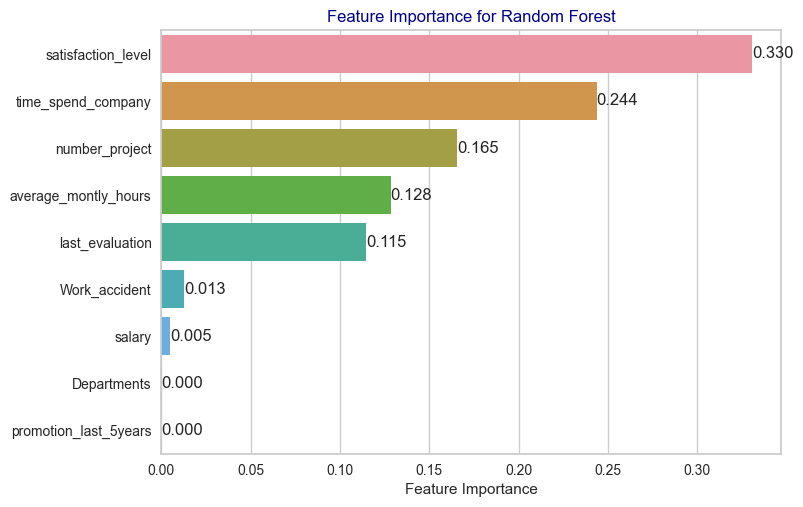

In [129]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest", color="darkblue")
plt.show()

Why we will not rebuild the model with more important features:

Normally we can rebuild the RF model with the more important features, however, since we have already limited number of features, we do not need to rebuild the model by decreasing the number of features. In addition, we willl get higher scores with other tree based models below.

#####  Prediction

In [130]:
# save the metrcis to compare in the end
y_pred = rf_pipe.predict(X_test)
y_pred_proba= rf_pipe.predict_proba(X_test)[:,1]

rf_AP = average_precision_score(y_test, y_pred_proba)
rf_rec = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test,y_pred)
rf_matthews =  matthews_corrcoef(y_test, y_pred)
rf_time =  measure_prediction_time(rf_pipe,X_test,10)
rf_AP, rf_rec, rf_f1, rf_matthews, rf_time

(0.9475602270276141,
 0.9371859296482412,
 0.8372615039281706,
 0.8075820822267484,
 0.02828636169433594)

#### Catboost Model

In [131]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

CatBoost stands for Categorical Boosting, and it is based on a boosting technique that combines multiple weak predictive models (decision trees) to create a strong predictive model. It is known for its ability to handle categorical features naturally, without requiring explicit encoding.

The algorithm works by iteratively building decision trees that predict the target variable (e.g., whether an employee will churn or not) based on the input features (e.g., employee characteristics). It uses a technique called gradient boosting, which focuses on improving the model's performance by minimizing prediction errors in each iteration.

One of the key advantages of CatBoost is its ability to automatically handle categorical features, which are often found in real-world datasets. It uses an innovative approach called ordered boosting, which transforms categorical features into numerical representations during the training process. This helps capture the underlying patterns and relationships between the categorical variables and the target variable.

Additionally, CatBoost incorporates advanced techniques to avoid overfitting and handle imbalanced datasets. It employs a combination of random permutations and ordered statistics to prevent the model from relying too heavily on individual data points or features.

In sum, CatBoost is a powerful and user-friendly algorithm that can deliver accurate predictions even with complex datasets containing categorical features. It simplifies the preprocessing steps and provides good performance out of the box, making it a popular choice for classification tasks.

Some of the main parameters of Catboost algorithm are:

learning_rate: This parameter controls the step size at each iteration of the boosting process. A higher learning rate allows for faster convergence but may lead to overfitting, while a lower learning rate can help prevent overfitting but may require more iterations for convergence.

depth: This parameter determines the depth of each decision tree in the ensemble. Increasing the depth allows the model to capture more complex interactions in the data but also increases the risk of overfitting. It is important to find an optimal depth that balances model complexity and generalization.

iterations: This parameter specifies the number of boosting iterations to perform. Each iteration adds a new decision tree to the ensemble. Increasing the number of iterations can improve the model's performance, but it also increases the computational time.

l2_leaf_reg: This parameter controls the L2 regularization applied to the leaf weights of the decision trees. It helps to prevent overfitting by adding a penalty term to the loss function based on the magnitudes of the leaf weights.

random_strength: This parameter introduces randomness into the feature selection process during tree construction. It controls the probability of selecting a random feature at each split. Adding randomness can help improve generalization and reduce overfitting.

border_count: This parameter determines the number of discrete values used to approximate numerical features. A higher value allows for more precise representation of numerical features but also increases memory usage.

##### Model Building

In [132]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()


# Create a CatBoostClassifier model
cat_model = CatBoostClassifier(random_state = 42, verbose=500, auto_class_weights='Balanced', cat_features = cat_features, 
                               early_stopping_rounds=10, depth=3, use_best_model=True) 

# Fit the model on the training data
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.055391
0:	learn: 0.6423499	test: 0.6410303	best: 0.6410303 (0)	total: 172ms	remaining: 2m 51s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.1359220334
bestIteration = 239

Shrink model to first 240 iterations.


##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [133]:
print("CATBOOST MODEL")
eval_metric(cat_model, X_train, y_train, X_test, y_test)

CATBOOST MODEL
Test_Set
[[1946   55]
 [  25  373]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.87      0.94      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7788  211]
 [  93 1500]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7999
           1       0.88      0.94      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.93      0.96      0.94      9592
weighted avg       0.97      0.97      0.97      9592



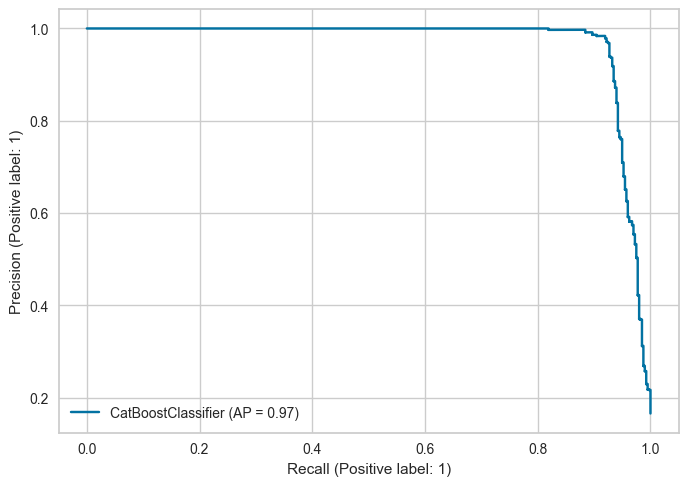

In [134]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = cat_model.predict_proba(X_test)

PrecisionRecallDisplay.from_estimator(cat_model,X_test, y_test)
plt.show();

##### Catboost Hyperparameter Tuning

In [137]:
from flaml import AutoML

cat_automl = AutoML()
settings = {
    "time_budget": 120,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['catboost'],  # list of ML learners; we tune XGBoost in this example
    "task": 'classification',  # task type
    "seed": 42,  # random seed
}
cat_automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 06-16 18:19:40] {1693} INFO - task = classification
[flaml.automl.logger: 06-16 18:19:40] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-16 18:19:40] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-16 18:19:40] {1801} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 06-16 18:19:40] {1911} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl.logger: 06-16 18:19:40] {2221} INFO - iteration 0, current learner catboost
[flaml.automl.logger: 06-16 18:20:00] {2347} INFO - Estimated sufficient time budget=202173s. Estimated necessary time budget=202s.
[flaml.automl.logger: 06-16 18:20:00] {2394} INFO -  at 20.3s,	estimator catboost's best error=0.0185,	best estimator catboost's best error=0.0185
[flaml.automl.logger: 06-16 18:20:00] {2221} INFO - iteration 1, current learner catboost
[flaml.automl.logger: 06-16 18:20:23] {2394} INFO -  at 43.3s,	estimator catboost's best error=0.0185,	best estimator catbo

In [138]:
'''retrieve best config and best learner'''
print('Best ML leaner:', cat_automl.best_estimator)
print('Best hyperparmeter config:', cat_automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-cat_automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(cat_automl.best_config_train_time))

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 12, 'learning_rate': 0.09117693591505072, 'n_estimators': 179}
Best accuracy on validation data: 0.9822
Training duration of best run: 5.941 s


In [139]:
print("CAT-Tuned MODEL")
eval_metric(cat_automl, X_train, y_train, X_test, y_test)

CAT-Tuned MODEL
Test_Set
[[1990   11]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7965   34]
 [ 120 1473]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.98      0.92      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



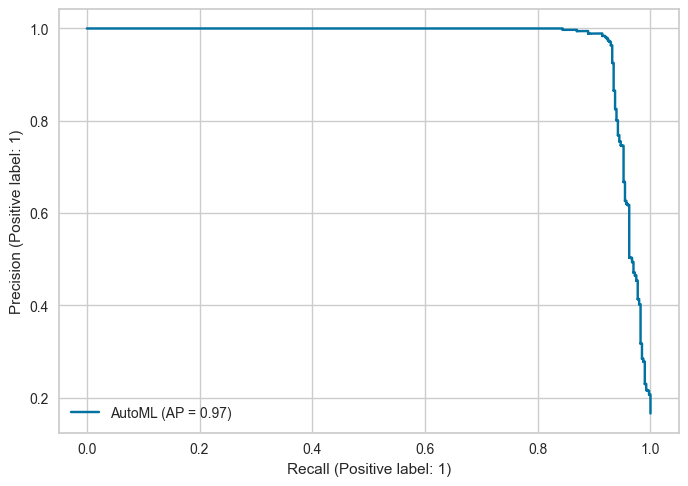

In [140]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(cat_automl, 
                                      X_test, 
                                      y_test);

#####  Prediction

In [141]:
y_pred = cat_automl.predict(X_test)
y_pred_proba= cat_automl.predict_proba(X_test)[:,1]

cata_AP = average_precision_score(y_test, y_pred_proba)
cata_rec = recall_score(y_test, y_pred)
cata_f1 = f1_score(y_test,y_pred)
cata_matthews =  matthews_corrcoef(y_test, y_pred)
cata_time =  measure_prediction_time(cat_automl,X_test)

cata_AP,cata_rec,cata_f1,cata_matthews,cata_time

(0.9675314974138535,
 0.9296482412060302,
 0.9499358151476253,
 0.9405566201555938,
 0.017170119285583495)

In [142]:
y_pred = cat_model.predict(X_test)
y_pred_proba= cat_model.predict_proba(X_test)[:,1]

cat_AP = average_precision_score(y_test, y_pred_proba)
cat_rec = recall_score(y_test, y_pred)
cat_f1 = f1_score(y_test,y_pred)
cat_matthews =  matthews_corrcoef(y_test, y_pred)
cat_time =  measure_prediction_time(cat_model,X_test)

cat_AP,cat_rec,cat_f1,cat_matthews,cat_time

(0.9688734453740755,
 0.9371859296482412,
 0.9031476997578693,
 0.8838893929306114,
 0.003689002990722656)

Result for CATBOOST:

Since the scores of tuned model is better than untuned model, we will use the former one. Here is a breakdown of the different metrics and what they mean in the context of this churn prediction task:

Test Set:

True Negative (TN): 1989 - The number of instances correctly predicted as non-churned employees.
False Positive (FP): 12 - The number of instances incorrectly predicted as churned employees when they are actually non-churned employees.
False Negative (FN): 28 - The number of instances incorrectly predicted as non-churned employees when they are actually churned employees.
True Positive (TP): 370 - The number of instances correctly predicted as churned employees.
Precision: Precision is the ratio of true positives to the sum of true positives and false positives. In the test set, the precision for churned employees is 0.97, which means that 97% of the employees predicted as churned by the model are actually churned employees.

Recall: Recall is the ratio of true positives to the sum of true positives and false negatives. In the test set, the recall for churned employees is 0.93, indicating that the model identifies 93% of the actual churned employees.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. In the test set, the F1-score for churned employees is 0.95, indicating a good balance between precision and recall.

Accuracy: Accuracy is the overall correct prediction rate of the model. In the test set, the accuracy is 0.98, which means that the model accurately predicts whether an employee will churn or not with 97% accuracy.

All in all, the CatBoost model shows strong performance in predicting employee churn, with high precision, recall, and F1-score for churned employees. The model correctly identifies a significant number of churned employees (TP), while minimizing false positives (FP).

#### XGBoost Model

In [143]:
from xgboost import XGBClassifier

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm known for its high performance and efficiency in handling structured data. It belongs to the family of gradient boosting algorithms, which are ensemble methods that combine multiple weak predictive models (typically decision trees) to create a strong predictive model.

How does XGBoost work?:

Boosting: XGBoost uses a boosting technique where models are trained sequentially, with each model attempting to correct the mistakes made by the previous models. It trains a new model to predict the errors (residuals) of the previous models.
Gradient Optimization: XGBoost uses gradient optimization to train the models. It calculates the gradient of a loss function (such as mean squared error or log loss) with respect to the predicted values of the previous models. The new model is trained to minimize this gradient, which helps improve the overall model's performance.
Decision Trees: XGBoost uses decision trees as base learners. Decision trees are simple, hierarchical models that make predictions based on a series of if-else conditions. XGBoost can create decision trees of varying depth and complexity.
Regularization: XGBoost incorporates regularization techniques to prevent overfitting and improve generalization. It includes terms in the objective function that penalize complex models, such as adding a regularization term to the loss function.
Feature Importance: XGBoost provides a measure of feature importance, indicating the relevance of each feature in the predictive model. It calculates the total reduction in the loss function that is achieved by splits on a particular feature, giving insights into which features are more influential.
The main parameters of XGBoost can be categorized into three groups: general parameters, booster parameters, and task-specific parameters. Here's a simplified explanation of each group:

1) General Parameters:

n_estimators: The number of boosting rounds (or decision trees) to build. It controls the overall complexity and number of models in the ensemble.
learning_rate: Controls the step size at each boosting iteration. A lower learning rate requires more boosting rounds but can yield better generalization.
max_depth: The maximum depth of each decision tree. It determines the complexity of individual trees and affects the model's ability to capture interactions.
subsample: The fraction of training samples used for training each tree. It helps combat overfitting by introducing randomness into the training process.
colsample_bytree: The fraction of features (columns) used for training each tree. It helps control the diversity of the features considered in each tree.
Booster Parameters:

booster: The type of booster to use, such as "gbtree" for tree-based models or "gblinear" for linear models.
gamma: Controls the minimum loss reduction required to make a further partition on a leaf node of the tree. It helps control the tree's complexity.
reg_alpha and reg_lambda: L1 and L2 regularization terms applied to the weights of the tree. They help control overfitting by adding regularization penalties.
min_child_weight: Controls the minimum sum of instance weights required in a child node. It helps control the tree's complexity and can improve robustness.

##### Model Building

In [144]:
cat_ordinal = ['salary','Departments']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value'
                             ,unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [145]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101, max_depth =3))]

xgb_pipe = Pipeline(steps=operations_xgb)

# XGboost algortimasının multiclass datalar için weight_class hyper parametresi olmadığından. fit fonksiyonu içinde 
# sample_weight hyper paremetresini kullanabiliyoruz.

params_pipe_xgb = {
    'XGB_model__sample_weight': classes_weights,
    # 'XGB_model__early_stopping_rounds': 10,   # Number of rounds with no improvement before stopping
    # 'XGB_model__eval_metric':'logloss',      # Evaluation metric for early stopping
    # 'XGB_model__eval_set':[(X_test, y_test)]
}

# Fit the pipeline on the training data
xgb_pipe.fit(X_train, y_train,**params_pipe_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'Departments'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=101, ...))])

##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [146]:
print("XGB MODEL")
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

XGB MODEL
Test_Set
[[1956   45]
 [  25  373]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2001
           1       0.89      0.94      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.96      0.95      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7863  136]
 [  71 1522]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7999
           1       0.92      0.96      0.94      1593

    accuracy                           0.98      9592
   macro avg       0.95      0.97      0.96      9592
weighted avg       0.98      0.98      0.98      9592



In [147]:
# Define the operations in the pipeline
operations_xgb = [
    ("OrdinalEncoder", OrdinalEncoder()), 
    ("XGB_model", XGBClassifier(random_state=101, max_depth=3))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_xgb)

# Defining fit params for cross-validation
xgb_pipe_params = {'XGB_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=xgb_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

Mean cross-validation scores:
test_accuracy      0.972686
train_accuracy     0.979853
test_f1            0.919333
train_f1           0.940528
test_recall        0.936594
train_recall       0.959196
test_precision     0.902832
train_precision    0.922580
dtype: float64


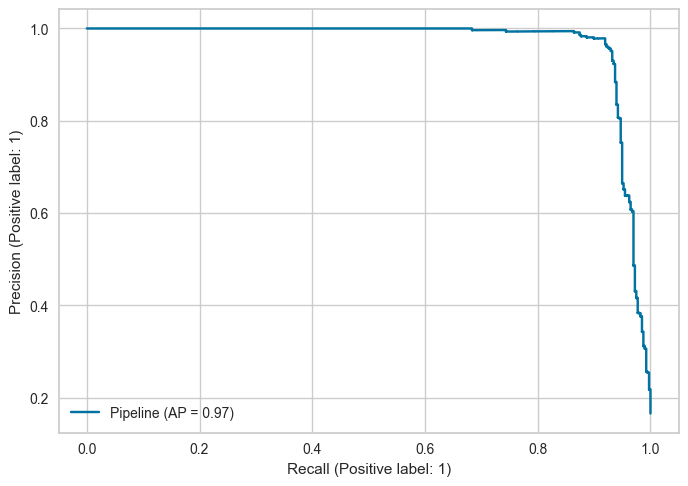

In [148]:
# check overall performance of the model
PrecisionRecallDisplay.from_estimator(xgb_pipe, X_test, y_test);

##### XGBoost Hyper-Parameter Tuning

In [149]:
from flaml import AutoML

xgb_automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['xgboost'],  # list of ML learners; we tune XGBoost in this example
    "task": 'classification',  # task type
    "seed": 42,  # random seed
}
xgb_automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 06-16 18:23:26] {1693} INFO - task = classification
[flaml.automl.logger: 06-16 18:23:26] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-16 18:23:26] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-16 18:23:26] {1801} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 06-16 18:23:26] {1911} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 06-16 18:23:26] {2221} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 06-16 18:23:26] {2347} INFO - Estimated sufficient time budget=1491s. Estimated necessary time budget=1s.
[flaml.automl.logger: 06-16 18:23:26] {2394} INFO -  at 0.2s,	estimator xgboost's best error=0.0734,	best estimator xgboost's best error=0.0734
[flaml.automl.logger: 06-16 18:23:26] {2221} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 06-16 18:23:26] {2394} INFO -  at 0.3s,	estimator xgboost's best error=0.0734,	best estimator xgboost's best er

[flaml.automl.logger: 06-16 18:23:56] {2221} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 06-16 18:23:57] {2394} INFO -  at 31.9s,	estimator xgboost's best error=0.0154,	best estimator xgboost's best error=0.0154
[flaml.automl.logger: 06-16 18:23:57] {2221} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 06-16 18:23:58] {2394} INFO -  at 32.6s,	estimator xgboost's best error=0.0154,	best estimator xgboost's best error=0.0154
[flaml.automl.logger: 06-16 18:23:58] {2221} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 06-16 18:24:01] {2394} INFO -  at 35.1s,	estimator xgboost's best error=0.0154,	best estimator xgboost's best error=0.0154
[flaml.automl.logger: 06-16 18:24:01] {2221} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 06-16 18:24:02] {2394} INFO -  at 35.9s,	estimator xgboost's best error=0.0154,	best estimator xgboost's best error=0.0154
[flaml.automl.logger: 06-16 18:24:02] {2221} INFO - iteratio

In [150]:
'''retrieve best config and best learner'''
print('Best ML leaner:', xgb_automl.best_estimator)
print('Best hyperparmeter config:', xgb_automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-xgb_automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(xgb_automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 111, 'max_leaves': 52, 'min_child_weight': 0.001, 'learning_rate': 0.15384631170218216, 'subsample': 1.0, 'colsample_bylevel': 0.7127864536559863, 'colsample_bytree': 0.9227606819338154, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.1329889441043734}
Best accuracy on validation data: 0.9847
Training duration of best run: 0.505 s


In [151]:
print("XGB-Tuned MODEL")
eval_metric(xgb_automl, X_train, y_train, X_test, y_test)

XGB-Tuned MODEL
Test_Set
[[1993    8]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



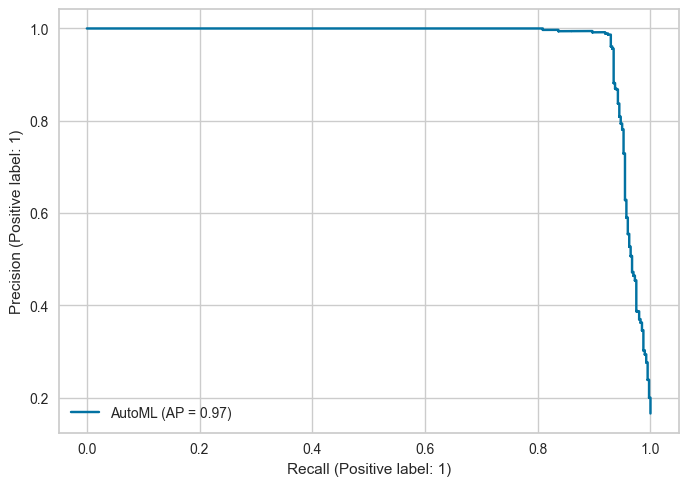

In [152]:
PrecisionRecallDisplay.from_estimator(xgb_automl, X_test, y_test);

#####  Prediction

In [153]:
y_pred = xgb_pipe.predict(X_test)
y_pred_proba= xgb_pipe.predict_proba(X_test)[:,1]

xgb_AP = average_precision_score(y_test, y_pred_proba)
xgb_rec = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test,y_pred)
xgb_matthews =  matthews_corrcoef(y_test, y_pred)
xgb_time =  measure_prediction_time(xgb_pipe,X_test)

xgb_AP,xgb_rec,xgb_f1,xgb_matthews,xgb_time

(0.9678409947498632,
 0.9371859296482412,
 0.9142156862745098,
 0.8970404748197968,
 0.009922528266906738)

In [154]:
y_pred = xgb_automl.predict(X_test)
y_pred_proba= xgb_automl.predict_proba(X_test)[:,1]

xgba_AP = average_precision_score(y_test, y_pred_proba)
xgba_rec = recall_score(y_test, y_pred)
xgba_f1 = f1_score(y_test,y_pred)
xgba_matthews =  matthews_corrcoef(y_test, y_pred)
xgba_time =  measure_prediction_time(xgb_automl,X_test,10)

xgba_AP,xgba_rec,xgba_f1,xgba_matthews,xgba_time

(0.9687489949523179,
 0.9296482412060302,
 0.9536082474226804,
 0.9451112697769987,
 0.018934011459350586)

Result for XGBoost:

Based on the results above, both the XGBoost model's test and train sets show high precision, recall, and F1-score for both classes. The model performs well in correctly identifying employees who have churned (class 1), with relatively low false positive and false negative rates. The accuracy of the model is also high, indicating that it provides accurate predictions overall.

#### LightGBM Model

In [155]:
from lightgbm import LGBMClassifier

LightGBM is a gradient boosting framework that is designed to be efficient and scalable. It uses a tree-based learning algorithm similar to XGBoost but with some differences in implementation. Here's a simplified explanation of LightGBM:

LightGBM uses the concept of leaf-wise tree growth instead of level-wise tree growth like other gradient boosting algorithms. This allows it to grow trees more efficiently and achieve better performance with less memory usage.

The main parameters of LightGBM can be categorized into two groups: general parameters, boosting parameters

1) General Parameters:

num_iterations: The number of boosting iterations (or trees) to build.
learning_rate: Controls the step size at each boosting iteration. A lower learning rate requires more boosting rounds but can yield better generalization.
num_leaves: The maximum number of leaves (terminal nodes) in each tree. It determines the complexity and depth of the trees.
feature_fraction: The fraction of features (columns) used for training each tree. It helps control the diversity of the features considered in each tree.
bagging_fraction: The fraction of training data used for training each tree. It helps combat overfitting by introducing randomness into the training process.
2) Boosting Parameters:

boosting_type: The type of boosting algorithm to use, such as "gbdt" for traditional gradient boosting or "dart" for a dropout-based variant.
max_depth: The maximum depth of each tree. It determines the complexity of individual trees and affects the model's ability to capture interactions.
min_child_samples: The minimum number of samples required to form a new leaf. It helps control the tree's complexity and can improve robustness.

##### Model Building

In [156]:
operations_lgbm = [("OrdinalEncoder", column_trans), 
                  ("lgbm_model", LGBMClassifier(random_state=101, max_depth =3, objective='binary'))]

lgbm_pipe = Pipeline(steps=operations_lgbm)

params_pipe_lgbm = {
    'lgbm_model__sample_weight': classes_weights,
    # 'lgbm_model__early_stopping_rounds': 10,   # Number of rounds with no improvement before stopping
    # 'lgbm_model__eval_metric':'logloss',      # Evaluation metric for early stopping
    # 'lgbm_model__eval_set':[(X_test, y_test)]
}

# Fit the pipeline on the training data
lgbm_pipe.fit(X_train, y_train,**params_pipe_lgbm)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'Departments'])],
                                   verbose_feature_names_out=False)),
                ('lgbm_model',
                 LGBMClassifier(max_depth=3, objective='binary',
                                random_state=101))])

##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [157]:
print("LGBM MODEL")
eval_metric(lgbm_pipe, X_train, y_train, X_test, y_test)

LGBM MODEL
Test_Set
[[1949   52]
 [  26  372]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.88      0.93      0.91       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7823  176]
 [  92 1501]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7999
           1       0.90      0.94      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.94      0.96      0.95      9592
weighted avg       0.97      0.97      0.97      9592



In [158]:
# Define the operations in the pipeline
operations_lgbm = [
    ("OrdinalEncoder", OrdinalEncoder()), 
    ("lgbm_model", LGBMClassifier(random_state=101, max_depth=3))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_lgbm)

# Defining fit params for cross-validation
lgbm_pipe_params = {'lgbm_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=lgbm_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

Mean cross-validation scores:
test_accuracy      0.970809
train_accuracy     0.973233
test_f1            0.914053
train_f1           0.921099
test_recall        0.934713
train_recall       0.940678
test_precision     0.894338
train_precision    0.902346
dtype: float64


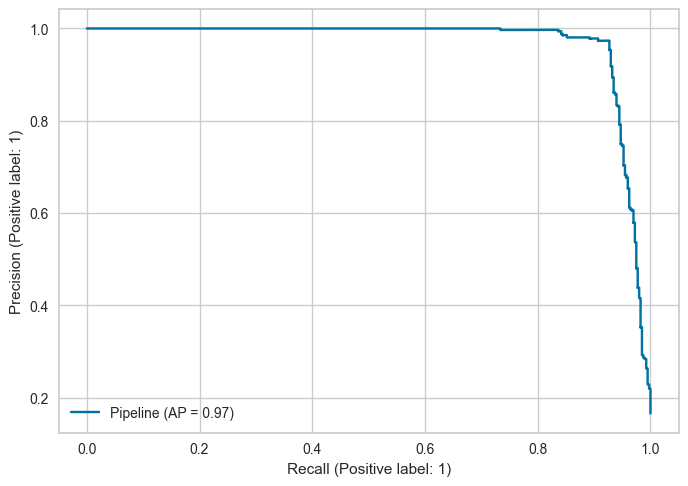

In [159]:
PrecisionRecallDisplay.from_estimator(lgbm_pipe, X_test, y_test);

##### LightGBM Hyper-Parameter Tuning

In [160]:
# custom_metric in overfiti engelledigini gorduk ancak ap metrigi daha iyi sonuc verdi
def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = log_loss(y_val, y_pred, labels=labels,
                         sample_weight=weight_val)
    y_pred = estimator.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred, labels=labels,
                          sample_weight=weight_train)
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

In [161]:
lgbm_automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'ap',
    "estimator_list": ['lgbm'],  # list of ML learners; we tune LightGBM in this example
    "task": 'classification',  # task type
    "seed": 42,  # random seed
}

# settings["custom_hp"] = {
#     "lgbm": {
#         "class_weight": {
#             "domain": "balanced",
#             "init_value": "balanced"
#         }
#     }
# }
lgbm_automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 06-16 18:26:08] {1693} INFO - task = classification
[flaml.automl.logger: 06-16 18:26:08] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-16 18:26:08] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-16 18:26:08] {1801} INFO - Minimizing error metric: 1-ap
[flaml.automl.logger: 06-16 18:26:08] {1911} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 06-16 18:26:08] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-16 18:26:08] {2347} INFO - Estimated sufficient time budget=990s. Estimated necessary time budget=1s.
[flaml.automl.logger: 06-16 18:26:08] {2394} INFO -  at 0.1s,	estimator lgbm's best error=0.1605,	best estimator lgbm's best error=0.1605
[flaml.automl.logger: 06-16 18:26:08] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-16 18:26:08] {2394} INFO -  at 0.2s,	estimator lgbm's best error=0.1605,	best estimator lgbm's best error=0.1605
[flaml.automl.log

[flaml.automl.logger: 06-16 18:26:25] {2394} INFO -  at 17.3s,	estimator lgbm's best error=0.0298,	best estimator lgbm's best error=0.0298
[flaml.automl.logger: 06-16 18:26:25] {2221} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 06-16 18:26:26] {2394} INFO -  at 18.2s,	estimator lgbm's best error=0.0298,	best estimator lgbm's best error=0.0298
[flaml.automl.logger: 06-16 18:26:26] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 06-16 18:26:27] {2394} INFO -  at 18.9s,	estimator lgbm's best error=0.0298,	best estimator lgbm's best error=0.0298
[flaml.automl.logger: 06-16 18:26:27] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 06-16 18:26:27] {2394} INFO -  at 19.1s,	estimator lgbm's best error=0.0298,	best estimator lgbm's best error=0.0298
[flaml.automl.logger: 06-16 18:26:27] {2221} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 06-16 18:26:27] {2394} INFO -  at 19.5s,	estimator lgbm's best error=0.029

[flaml.automl.logger: 06-16 18:27:02] {2221} INFO - iteration 71, current learner lgbm
[flaml.automl.logger: 06-16 18:27:02] {2394} INFO -  at 54.2s,	estimator lgbm's best error=0.0288,	best estimator lgbm's best error=0.0288
[flaml.automl.logger: 06-16 18:27:02] {2221} INFO - iteration 72, current learner lgbm
[flaml.automl.logger: 06-16 18:27:03] {2394} INFO -  at 54.7s,	estimator lgbm's best error=0.0288,	best estimator lgbm's best error=0.0288
[flaml.automl.logger: 06-16 18:27:03] {2221} INFO - iteration 73, current learner lgbm
[flaml.automl.logger: 06-16 18:27:04] {2394} INFO -  at 56.5s,	estimator lgbm's best error=0.0288,	best estimator lgbm's best error=0.0288
[flaml.automl.logger: 06-16 18:27:04] {2221} INFO - iteration 74, current learner lgbm
[flaml.automl.logger: 06-16 18:27:05] {2394} INFO -  at 56.8s,	estimator lgbm's best error=0.0288,	best estimator lgbm's best error=0.0288
[flaml.automl.logger: 06-16 18:27:05] {2221} INFO - iteration 75, current learner lgbm
[flaml.au

In [162]:
'''retrieve best config and best learner'''
print('Best ML leaner:', lgbm_automl.best_estimator)
print('Best hyperparmeter config:', lgbm_automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-lgbm_automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(lgbm_automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 108, 'num_leaves': 20, 'min_child_samples': 4, 'learning_rate': 0.06129323571151544, 'log_max_bin': 7, 'colsample_bytree': 0.9941025833950202, 'reg_alpha': 0.009618999870314945, 'reg_lambda': 0.024556536437705015}
Best accuracy on validation data: 0.9712
Training duration of best run: 0.2602 s


In [163]:
print("LGBM-Tuned MODEL")
eval_metric(lgbm_automl, X_train, y_train, X_test, y_test)

LGBM-Tuned MODEL
Test_Set
[[1994    7]
 [  27  371]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7981   18]
 [ 102 1491]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



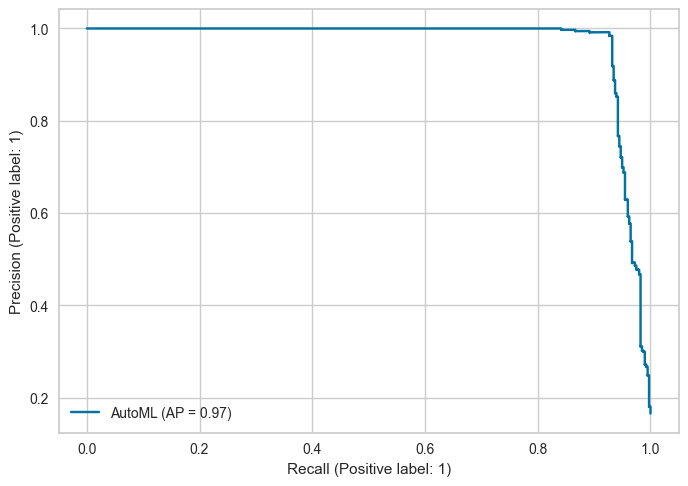

In [164]:
PrecisionRecallDisplay.from_estimator(lgbm_automl, X_test, y_test);

#####  Prediction

In [165]:
y_pred = lgbm_pipe.predict(X_test)
y_pred_proba= lgbm_pipe.predict_proba(X_test)[:,1]

lgbm_AP = average_precision_score(y_test, y_pred_proba)
lgbm_rec = recall_score(y_test, y_pred)
lgbm_f1 = f1_score(y_test,y_pred)
lgbm_matthews =  matthews_corrcoef(y_test, y_pred)
lgbm_time =  measure_prediction_time(lgbm_pipe,X_test)

lgbm_AP,lgbm_rec,lgbm_f1,lgbm_matthews,lgbm_time

(0.968616185380492,
 0.9346733668341709,
 0.9051094890510949,
 0.8861609561204485,
 0.010496425628662109)

In [166]:
y_pred = lgbm_automl.predict(X_test)
y_pred_proba= lgbm_automl.predict_proba(X_test)[:,1]

lgbma_AP = average_precision_score(y_test, y_pred_proba)
lgbma_rec = recall_score(y_test, y_pred)
lgbma_f1 = f1_score(y_test,y_pred)
lgbma_matthews = matthews_corrcoef(y_test, y_pred)
lgbma_time =  measure_prediction_time(lgbm_automl,X_test)

lgbma_AP,lgbma_rec,lgbma_f1, lgbma_matthews,lgbma_time

(0.9689789266363271,
 0.9321608040201005,
 0.9561855670103092,
 0.9481869141004056,
 0.016765737533569337)

RESULT for LightGBM

As seen above, the general scores of the light gbm is very high, similar to catboost and xgboost models.

These scores indicate that the LGBM-tuned model is highly accurate in identifying churned employees (high precision), captures a significant portion of actual churned employees (high recall), and maintains a good balance between precision and recall (high F1-score). This suggests that the model can effectively predict which employees are likely to churn, enabling proactive measures to be taken to retain valuable employees and reduce attrition.

#### Deep Learning(ANN) Model

In [169]:
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.experimental import enable_halving_search_cv
# grid search libraries
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from livelossplot import PlotLossesKerasTF

Deep learning refers to a subset of machine learning algorithms that are based on artificial neural networks (ANNs). ANNs are computational models inspired by the structure and functioning of the human brain. Deep learning ANN, or deep neural network (DNN), is an ANN with multiple layers of interconnected neurons.

How a deep learning ANN works:

Architecture: A deep learning ANN consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of multiple artificial neurons, also called nodes or units. Neurons in one layer are connected to neurons in the next layer through weighted connections.
Forward Propagation: The input data is fed into the input layer, and the values propagate forward through the network. Each neuron in a layer receives input from the previous layer, performs a computation using the weighted connections and an activation function, and passes the output to the next layer. This process continues until the output layer produces the final prediction.
Activation Function: The activation function introduces non-linearities to the network, allowing it to learn complex patterns and relationships in the data. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).
Training: The deep learning ANN is trained using a process called backpropagation. Initially, the network's weights are randomly initialized. The training data, along with their known target values, are used to compute the prediction error. The error is then backpropagated through the network, adjusting the weights based on the error gradient and an optimization algorithm (e.g., gradient descent). This process is repeated iteratively, updating the weights to minimize the prediction error.
Learning Features: One of the key advantages of deep learning ANN is its ability to automatically learn features from raw data. Instead of relying on manual feature engineering, deep learning models can learn and extract relevant features from the data during the training process. This feature learning capability is particularly useful in complex tasks such as image and text analysis.
Predictions: Once the deep learning ANN is trained, it can be used to make predictions on new, unseen data. The input data is fed into the trained network, and the output layer produces the predicted values or classes.

##### Model Building

In [170]:
X = df.drop('left', axis=1)
y = df['left'].values

In [171]:
# split the data as train, validation and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [172]:
# prepare the features for encoding
cat_onehot = ['Departments'] # onehot encoding for departments feature (no hierarchy between various departments)
cat_ordinal = ['salary'] # ordinal encoding for salary bec of hierarchical order betweenn the labels

cat_for_salary = ["low", "medium", "high"] # define the order among different salary groups 

# encode the abovementioned features
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_salary])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [173]:
X_train = column_trans.fit_transform(X_train) # fit_transform for train, transform for other to avoid data leakage
X_val = column_trans.transform(X_val)
X_test = column_trans.transform(X_test)

In [174]:
scaler = MinMaxScaler() # Minmax scaler mostly used for deep learning as a rule of thumb

In [175]:
# scale the data; fit_transform for train, transform val and test
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [176]:
# this custom metric ONLY works on binary classification problems.
from keras import backend as K

def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())

In [207]:
# build the model by balancing the class weights
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(28, activation="relu"))
model.add(Dense(14, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=[matthews_correlation_coefficient])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20,
                           restore_best_weights = True)

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}

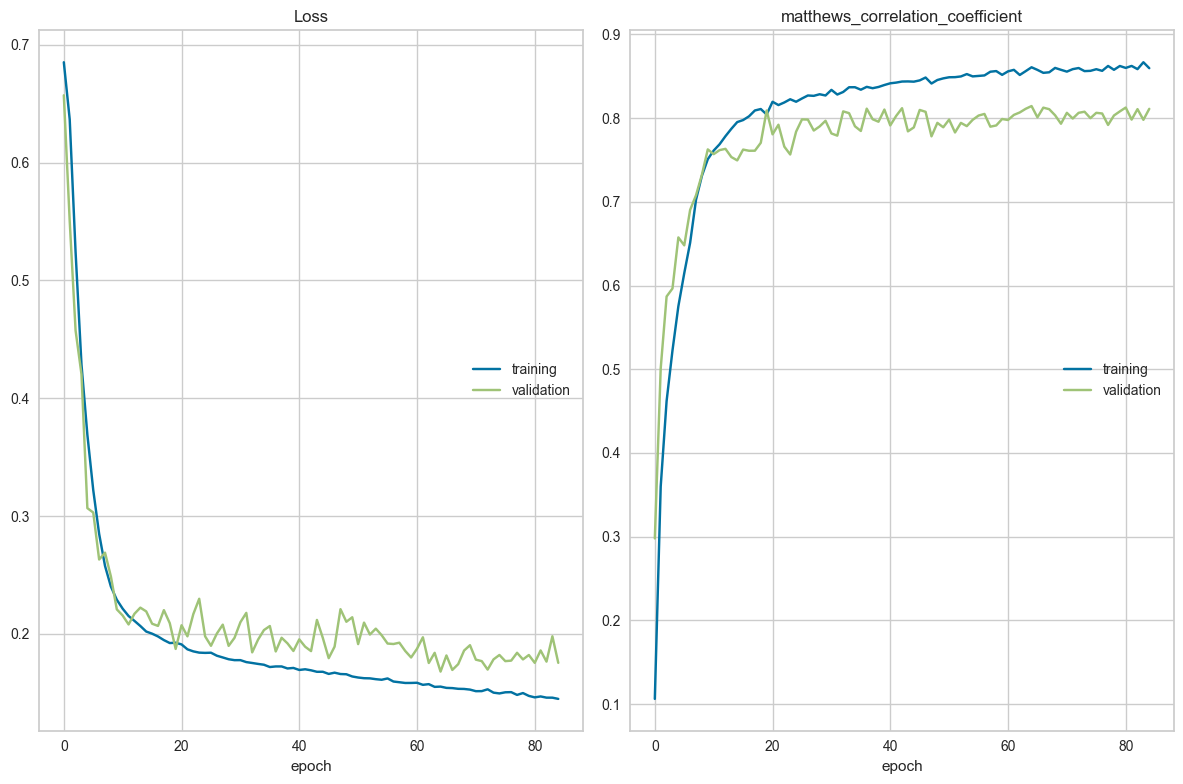

Loss
	training         	 (min:    0.145, max:    0.685, cur:    0.145)
	validation       	 (min:    0.168, max:    0.657, cur:    0.176)
matthews_correlation_coefficient
	training         	 (min:    0.106, max:    0.867, cur:    0.860)
	validation       	 (min:    0.298, max:    0.814, cur:    0.811)
72/72 [==============================] - 1s 9ms/step - loss: 0.1449 - matthews_correlation_coefficient: 0.8596 - val_loss: 0.1755 - val_matthews_correlation_coefficient: 0.8111
Epoch 85: early stopping


In [208]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights) 

##### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

<Axes: >

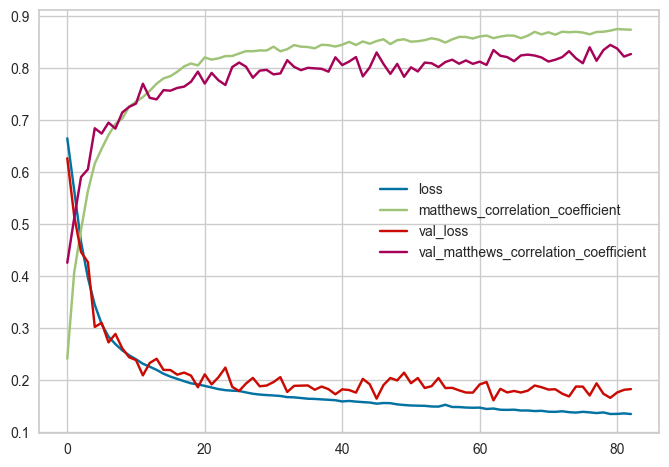

In [181]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [182]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 [==============================] - 0s 1ms/step
[[1457   43]
 [  28  271]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1500
           1       0.86      0.91      0.88       299

    accuracy                           0.96      1799
   macro avg       0.92      0.94      0.93      1799
weighted avg       0.96      0.96      0.96      1799



57/57 [==============================] - 0s 1ms/step


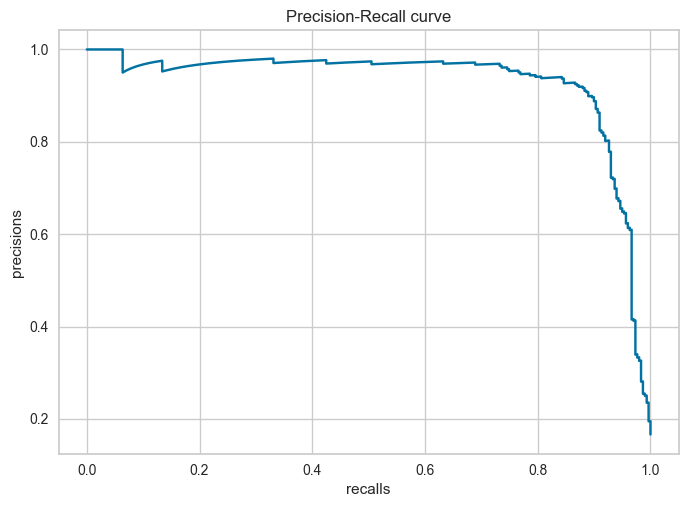

In [183]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

##### Optuna (Hyperparameter optimization) for ANN

In [188]:
import optuna
# optimizers for gradient descent to use in backpropagation

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [189]:
# we should define functions for optuna
trial_metric = matthews_correlation_coefficient
batch_size = 128 # for a faster modelling increase the batch size


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128) # trial: to try between these values
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    n_units3 = trial.suggest_int('n_units3', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)
    
    # n_units, optiizer and lr will be used below in the model layers

    tf.random.set_seed(42) # to compare, define seed
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(n_units3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model


def objective(trial):  # we use create_model function here; class weights also should be set here, bec model has no class_weight par
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [190]:
study = optuna.create_study(direction="maximize") # "direction maximize" means maximize recall (trial metric)
study.optimize(objective, n_trials=50) # objective function here # trial should be higher for better learning, for ex 100
study.best_params

[I 2023-06-16 18:35:05,289] A new study created in memory with name: no-name-23698580-d18a-4809-a68c-47f7f9a841ba


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:35:13,787] Trial 0 finished with value: 0.8882603645324707 and parameters: {'n_units1': 31, 'n_units2': 31, 'n_units3': 114, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0009442169833250229, 'w0': 0.09091219316919423, 'w1': 0.02053427640211659}. Best is trial 0 with value: 0.8882603645324707.


Restoring model weights from the end of the best epoch: 9.
Epoch 29: early stopping


[I 2023-06-16 18:35:20,455] Trial 1 finished with value: 0.8551777601242065 and parameters: {'n_units1': 19, 'n_units2': 120, 'n_units3': 67, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0030532823148636153, 'w0': 0.03162202346755719, 'w1': 0.1315516530930733}. Best is trial 0 with value: 0.8882603645324707.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:35:29,276] Trial 2 finished with value: 0.8100729584693909 and parameters: {'n_units1': 91, 'n_units2': 75, 'n_units3': 90, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00019926959301765285, 'w0': 0.061056157100362586, 'w1': 0.018513866557503218}. Best is trial 0 with value: 0.8882603645324707.
[I 2023-06-16 18:35:49,274] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 114, 'n_units2': 112, 'n_units3': 35, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0008048971173112455, 'w0': 2.142057016787323, 'w1': 2.984296565562862}. Best is trial 0 with value: 0.8882603645324707.
[I 2023-06-16 18:36:13,974] Trial 4 finished with value: 0.032683536410331726 and parameters: {'n_units1': 104, 'n_units2': 124, 'n_units3': 125, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 6.716973222593224e-05, 'w0': 0.14742165652405256, 'w1': 0.1390940369831332}. Best is trial 0 with value: 0.8882603

Restoring model weights from the end of the best epoch: 31.
Epoch 51: early stopping


[I 2023-06-16 18:36:30,086] Trial 5 finished with value: 0.9133490324020386 and parameters: {'n_units1': 26, 'n_units2': 94, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.029392397965764688, 'w0': 0.03504197641392882, 'w1': 0.021566623576280485}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 44.
Epoch 64: early stopping


[I 2023-06-16 18:36:43,467] Trial 6 finished with value: 0.9092874526977539 and parameters: {'n_units1': 10, 'n_units2': 70, 'n_units3': 57, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.005913280804079038, 'w0': 0.11914243992489243, 'w1': 0.043844249083282175}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:36:56,687] Trial 7 finished with value: 0.8660067319869995 and parameters: {'n_units1': 124, 'n_units2': 80, 'n_units3': 48, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00034758887356747527, 'w0': 1.4044272943801586, 'w1': 0.5802731290586777}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 21.
Epoch 41: early stopping


[I 2023-06-16 18:37:08,169] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 41, 'n_units2': 47, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0502937546914809, 'w0': 0.5088599362769635, 'w1': 0.01016611961822575}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 48.
Epoch 68: early stopping


[I 2023-06-16 18:37:31,492] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 88, 'n_units2': 115, 'n_units3': 60, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0010109545266262722, 'w0': 4.5445931405903375, 'w1': 0.09966592897949259}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-06-16 18:37:41,551] Trial 10 finished with value: 0.04255614057183266 and parameters: {'n_units1': 56, 'n_units2': 95, 'n_units3': 21, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.1418254299084713e-05, 'w0': 0.011725791144068147, 'w1': 0.40115202164662495}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 44.
Epoch 64: early stopping


[I 2023-06-16 18:38:00,696] Trial 11 finished with value: 0.8800777792930603 and parameters: {'n_units1': 10, 'n_units2': 55, 'n_units3': 83, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.016332709977273336, 'w0': 0.2800108446103492, 'w1': 0.041735275316480455}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 28.
Epoch 48: early stopping


[I 2023-06-16 18:38:13,610] Trial 12 finished with value: 0.8810381293296814 and parameters: {'n_units1': 52, 'n_units2': 10, 'n_units3': 40, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.12406417115444303, 'w0': 0.038227220303895186, 'w1': 0.04404997801339553}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 29.
Epoch 49: early stopping


[I 2023-06-16 18:38:25,263] Trial 13 finished with value: 0.8872843980789185 and parameters: {'n_units1': 8, 'n_units2': 88, 'n_units3': 52, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.005858085838676895, 'w0': 0.016607978931879788, 'w1': 0.04193025157463718}. Best is trial 5 with value: 0.9133490324020386.


Restoring model weights from the end of the best epoch: 42.
Epoch 62: early stopping


[I 2023-06-16 18:38:40,066] Trial 14 finished with value: 0.9137364625930786 and parameters: {'n_units1': 28, 'n_units2': 60, 'n_units3': 83, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.013356168027807988, 'w0': 0.11466916686222856, 'w1': 0.010099797741664633}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 50.
Epoch 70: early stopping


[I 2023-06-16 18:39:03,014] Trial 15 finished with value: 0.9068691730499268 and parameters: {'n_units1': 66, 'n_units2': 99, 'n_units3': 92, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.02714935370953853, 'w0': 0.047608292236222996, 'w1': 0.010544228386255386}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 58.
Epoch 78: early stopping


[I 2023-06-16 18:39:20,727] Trial 16 finished with value: 0.9038932919502258 and parameters: {'n_units1': 31, 'n_units2': 58, 'n_units3': 106, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.013324603547405786, 'w0': 0.021781904411125274, 'w1': 0.02245764261870292}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 19.
Epoch 39: early stopping


[I 2023-06-16 18:39:30,900] Trial 17 finished with value: 0.8031659722328186 and parameters: {'n_units1': 30, 'n_units2': 30, 'n_units3': 76, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.1281682371169391, 'w0': 0.06289307280372822, 'w1': 0.01193346604583884}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 23.
Epoch 43: early stopping


[I 2023-06-16 18:39:43,546] Trial 18 finished with value: 0.8759428858757019 and parameters: {'n_units1': 48, 'n_units2': 104, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03839914926885419, 'w0': 0.22873086886048644, 'w1': 0.021085781881905245}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 27.
Epoch 47: early stopping


[I 2023-06-16 18:39:57,813] Trial 19 finished with value: 0.8474326729774475 and parameters: {'n_units1': 73, 'n_units2': 40, 'n_units3': 100, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.002761963398803554, 'w0': 0.010006344350205884, 'w1': 0.0846677951727109}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 18.
Epoch 38: early stopping


[I 2023-06-16 18:40:08,966] Trial 20 finished with value: 0.9022189974784851 and parameters: {'n_units1': 25, 'n_units2': 61, 'n_units3': 11, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.010828568929337617, 'w0': 0.025498755122846776, 'w1': 0.06563568499301187}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:40:21,855] Trial 21 finished with value: 0.8884108662605286 and parameters: {'n_units1': 18, 'n_units2': 71, 'n_units3': 69, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.00673903095391576, 'w0': 0.10339195026866167, 'w1': 0.03059642095961576}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:40:30,056] Trial 22 finished with value: 0.8869611620903015 and parameters: {'n_units1': 41, 'n_units2': 80, 'n_units3': 55, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.004186817601836788, 'w0': 0.14180472481855055, 'w1': 0.015534693085807322}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 43.
Epoch 63: early stopping


[I 2023-06-16 18:40:41,446] Trial 23 finished with value: 0.907244086265564 and parameters: {'n_units1': 15, 'n_units2': 87, 'n_units3': 43, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.02204272069700531, 'w0': 0.07160377924105049, 'w1': 0.029353065470193125}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 8.
Epoch 28: early stopping


[I 2023-06-16 18:40:49,608] Trial 24 finished with value: 0.8755612969398499 and parameters: {'n_units1': 38, 'n_units2': 66, 'n_units3': 64, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.010083403949068611, 'w0': 0.038297363107637386, 'w1': 0.010359858728290091}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 70.
Epoch 90: early stopping


[I 2023-06-16 18:41:07,146] Trial 25 finished with value: 0.8811357617378235 and parameters: {'n_units1': 23, 'n_units2': 89, 'n_units3': 77, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06257380956255301, 'w0': 0.1281660943031949, 'w1': 0.05836193371176452}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 44.
Epoch 64: early stopping


[I 2023-06-16 18:41:23,136] Trial 26 finished with value: 0.8970009684562683 and parameters: {'n_units1': 62, 'n_units2': 47, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0022450314519487074, 'w0': 0.35123019428127106, 'w1': 0.029635742438921222}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 33.
Epoch 53: early stopping


[I 2023-06-16 18:41:35,373] Trial 27 finished with value: 0.0 and parameters: {'n_units1': 9, 'n_units2': 68, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.02457540231041104, 'w0': 0.05056155440967029, 'w1': 0.014936297692500504}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 28.
Epoch 48: early stopping


[I 2023-06-16 18:41:47,725] Trial 28 finished with value: 0.8883272409439087 and parameters: {'n_units1': 76, 'n_units2': 50, 'n_units3': 47, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.007912829002351034, 'w0': 0.17571695221872158, 'w1': 0.017484468784360375}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 42.
Epoch 62: early stopping


[I 2023-06-16 18:42:03,766] Trial 29 finished with value: 0.9072188138961792 and parameters: {'n_units1': 33, 'n_units2': 108, 'n_units3': 111, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.01640735118000201, 'w0': 0.08296356242803483, 'w1': 0.024545212658145986}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:42:14,747] Trial 30 finished with value: 0.883730411529541 and parameters: {'n_units1': 47, 'n_units2': 29, 'n_units3': 73, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.001787030615262697, 'w0': 0.09238314286723975, 'w1': 0.017029182785555853}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 41.
Epoch 61: early stopping


[I 2023-06-16 18:42:28,509] Trial 31 finished with value: 0.910060465335846 and parameters: {'n_units1': 16, 'n_units2': 88, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.021748946389025532, 'w0': 0.0709784081885169, 'w1': 0.030347325450373098}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 60.
Epoch 80: early stopping


[I 2023-06-16 18:42:45,542] Trial 32 finished with value: 0.8848265409469604 and parameters: {'n_units1': 23, 'n_units2': 78, 'n_units3': 59, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.004265515369035448, 'w0': 0.031637648896655886, 'w1': 0.04516816911560296}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 28.
Epoch 48: early stopping


[I 2023-06-16 18:42:56,296] Trial 33 finished with value: 0.905582845211029 and parameters: {'n_units1': 16, 'n_units2': 96, 'n_units3': 40, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03245785862149513, 'w0': 0.0955468896743122, 'w1': 0.029136662170524442}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 21.
Epoch 41: early stopping


[I 2023-06-16 18:43:10,429] Trial 34 finished with value: 0.8999888896942139 and parameters: {'n_units1': 29, 'n_units2': 84, 'n_units3': 88, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.009684664613291044, 'w0': 0.05362495861408944, 'w1': 0.014659351685464393}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 42.
Epoch 62: early stopping


[I 2023-06-16 18:43:23,302] Trial 35 finished with value: 0.8827095031738281 and parameters: {'n_units1': 19, 'n_units2': 72, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.05276955667520935, 'w0': 0.06890698925186296, 'w1': 0.01948829420611114}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 32.
Epoch 52: early stopping


[I 2023-06-16 18:43:36,328] Trial 36 finished with value: 0.8623618483543396 and parameters: {'n_units1': 35, 'n_units2': 65, 'n_units3': 126, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.005057223359159171, 'w0': 0.179529939735203, 'w1': 0.14334849787553824}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 20.
Epoch 40: early stopping


[I 2023-06-16 18:43:47,099] Trial 37 finished with value: 0.0 and parameters: {'n_units1': 15, 'n_units2': 39, 'n_units3': 51, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.020315032171566633, 'w0': 0.11263980857916696, 'w1': 0.06220296895201813}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 19.
Epoch 39: early stopping


[I 2023-06-16 18:43:59,865] Trial 38 finished with value: 0.9097435474395752 and parameters: {'n_units1': 25, 'n_units2': 120, 'n_units3': 64, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.01355482765808942, 'w0': 0.04773706847231555, 'w1': 0.014246384322459248}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 42.
Epoch 62: early stopping


[I 2023-06-16 18:44:19,306] Trial 39 finished with value: 0.9135878682136536 and parameters: {'n_units1': 43, 'n_units2': 126, 'n_units3': 65, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07759506848759101, 'w0': 0.04131134023158924, 'w1': 0.013369922667701532}. Best is trial 14 with value: 0.9137364625930786.


Restoring model weights from the end of the best epoch: 44.
Epoch 64: early stopping


[I 2023-06-16 18:44:36,576] Trial 40 finished with value: 0.9146080017089844 and parameters: {'n_units1': 44, 'n_units2': 128, 'n_units3': 96, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07802254625962081, 'w0': 0.031335782854793166, 'w1': 0.010473746948068276}. Best is trial 40 with value: 0.9146080017089844.


Restoring model weights from the end of the best epoch: 28.
Epoch 48: early stopping


[I 2023-06-16 18:44:49,925] Trial 41 finished with value: 0.9040663242340088 and parameters: {'n_units1': 44, 'n_units2': 128, 'n_units3': 99, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07905976598392818, 'w0': 0.025153529698693475, 'w1': 0.011042325878035338}. Best is trial 40 with value: 0.9146080017089844.


Restoring model weights from the end of the best epoch: 29.
Epoch 49: early stopping


[I 2023-06-16 18:45:03,208] Trial 42 finished with value: 0.8953412175178528 and parameters: {'n_units1': 53, 'n_units2': 114, 'n_units3': 81, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.08162077533275199, 'w0': 0.0315873876132293, 'w1': 0.02190399056155397}. Best is trial 40 with value: 0.9146080017089844.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:45:13,723] Trial 43 finished with value: 0.9187835454940796 and parameters: {'n_units1': 38, 'n_units2': 122, 'n_units3': 118, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.045156255431609865, 'w0': 0.015538707471223497, 'w1': 0.012977997997697017}. Best is trial 43 with value: 0.9187835454940796.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:45:35,076] Trial 44 finished with value: 0.9132795929908752 and parameters: {'n_units1': 60, 'n_units2': 121, 'n_units3': 122, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03947226795219568, 'w0': 0.015590269574083252, 'w1': 0.013198439236661799}. Best is trial 43 with value: 0.9187835454940796.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 18:45:52,868] Trial 45 finished with value: 0.9095607995986938 and parameters: {'n_units1': 40, 'n_units2': 124, 'n_units3': 118, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.05659683366253611, 'w0': 0.013650005918386485, 'w1': 0.01035404663657818}. Best is trial 43 with value: 0.9187835454940796.


Restoring model weights from the end of the best epoch: 28.
Epoch 48: early stopping


[I 2023-06-16 18:46:11,431] Trial 46 finished with value: 0.8832414746284485 and parameters: {'n_units1': 50, 'n_units2': 128, 'n_units3': 95, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0865730282502839, 'w0': 0.019201260940219046, 'w1': 0.016557117085025757}. Best is trial 43 with value: 0.9187835454940796.


Restoring model weights from the end of the best epoch: 50.
Epoch 70: early stopping


[I 2023-06-16 18:46:35,871] Trial 47 finished with value: 0.0 and parameters: {'n_units1': 97, 'n_units2': 108, 'n_units3': 105, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.032556704566386596, 'w0': 0.01931707085548237, 'w1': 0.010188159961161652}. Best is trial 43 with value: 0.9187835454940796.


Restoring model weights from the end of the best epoch: 25.
Epoch 45: early stopping


[I 2023-06-16 18:46:48,438] Trial 48 finished with value: 0.8827623724937439 and parameters: {'n_units1': 36, 'n_units2': 115, 'n_units3': 87, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.043516444652802404, 'w0': 0.013165973339876362, 'w1': 0.013030840614956078}. Best is trial 43 with value: 0.9187835454940796.


Restoring model weights from the end of the best epoch: 27.
Epoch 47: early stopping


[I 2023-06-16 18:47:08,280] Trial 49 finished with value: 0.824908435344696 and parameters: {'n_units1': 128, 'n_units2': 103, 'n_units3': 114, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.10280642794578654, 'w0': 0.03686199546056094, 'w1': 0.01998685899226227}. Best is trial 43 with value: 0.9187835454940796.


{'n_units1': 38,
 'n_units2': 122,
 'n_units3': 118,
 'optimizer': keras.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.045156255431609865,
 'w0': 0.015538707471223497,
 'w1': 0.012977997997697017}

In [201]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (study.best_params['n_units1'], # study.best_params[] get the best optuna params
                               study.best_params['n_units2'],
                               study.best_params['n_units3'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model_opt = Sequential()
model_opt.add(Dense(unit1, activation="relu"))
model_opt.add(Dense(unit2, activation="relu"))
model_opt.add(Dense(unit3, activation='relu'))
model_opt.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model_opt.compile(optimizer=opt, loss="binary_crossentropy", metrics=[matthews_correlation_coefficient])

# train model
model_opt.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=0)

Restoring model weights from the end of the best epoch: 43.
Epoch 63: early stopping


In [202]:
y_pred = (model_opt.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 [==============================] - 0s 2ms/step
[[1490   10]
 [  35  264]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1500
           1       0.96      0.88      0.92       299

    accuracy                           0.97      1799
   macro avg       0.97      0.94      0.95      1799
weighted avg       0.97      0.97      0.97      1799



57/57 [==============================] - 0s 2ms/step


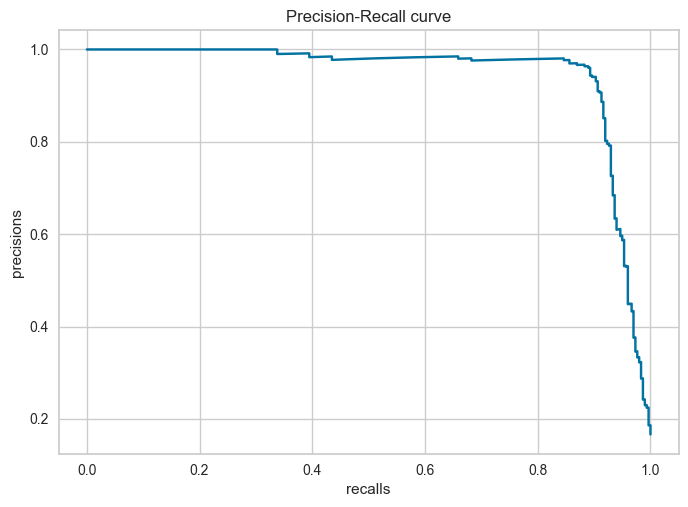

In [203]:
y_pred_proba = model_opt.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

#####  Prediction

In [209]:
y_pred_proba = model.predict(X_test)
y_pred = (model.predict(X_test) > .5).astype("int32")

ANN_AP = average_precision_score(y_test, y_pred_proba)
ANN_f1 = f1_score(y_test, y_pred)
ANN_recall = recall_score(y_test, y_pred)
ANN_matthews =  matthews_corrcoef(y_test, y_pred)
ANN_time =  measure_prediction_time(model,X_test)

ANN_AP, ANN_f1, ANN_recall, ANN_matthews, ANN_time

57/57 [==============================] - 0s 1ms/step


(0.9227303494218937,
 0.862681744749596,
 0.8929765886287625,
 0.8348891634391327,
 0.1553811550140381)

In [210]:
y_pred_proba = model_opt.predict(X_test)
y_pred = (model_opt.predict(X_test) > .5).astype("int32")

optuna_AP = average_precision_score(y_test, y_pred_proba)
optuna_f1 = f1_score(y_test, y_pred)
optuna_rec = recall_score(y_test, y_pred)
optuna_matthews =  matthews_corrcoef(y_test, y_pred)
optuna_time =  measure_prediction_time(model,X_test)

optuna_AP, optuna_f1, optuna_rec, optuna_matthews, optuna_time,

57/57 [==============================] - 0s 2ms/step


(0.9461971082386329,
 0.9214659685863874,
 0.882943143812709,
 0.9078459783518542,
 0.1679711103439331)

Why does Deep Learning - ANN have a lower score than some of the ML models?

This outcome is entirely dependent on the data. The dataset used in this project consists of approximately 12k samples after removing duplicates. Deep Learning models tend to perform better, particularly with larger datasets. However, traditional ML algorithms can still yield higher scores for certain datasets, such as the one utilized in this project.

### Compare Models

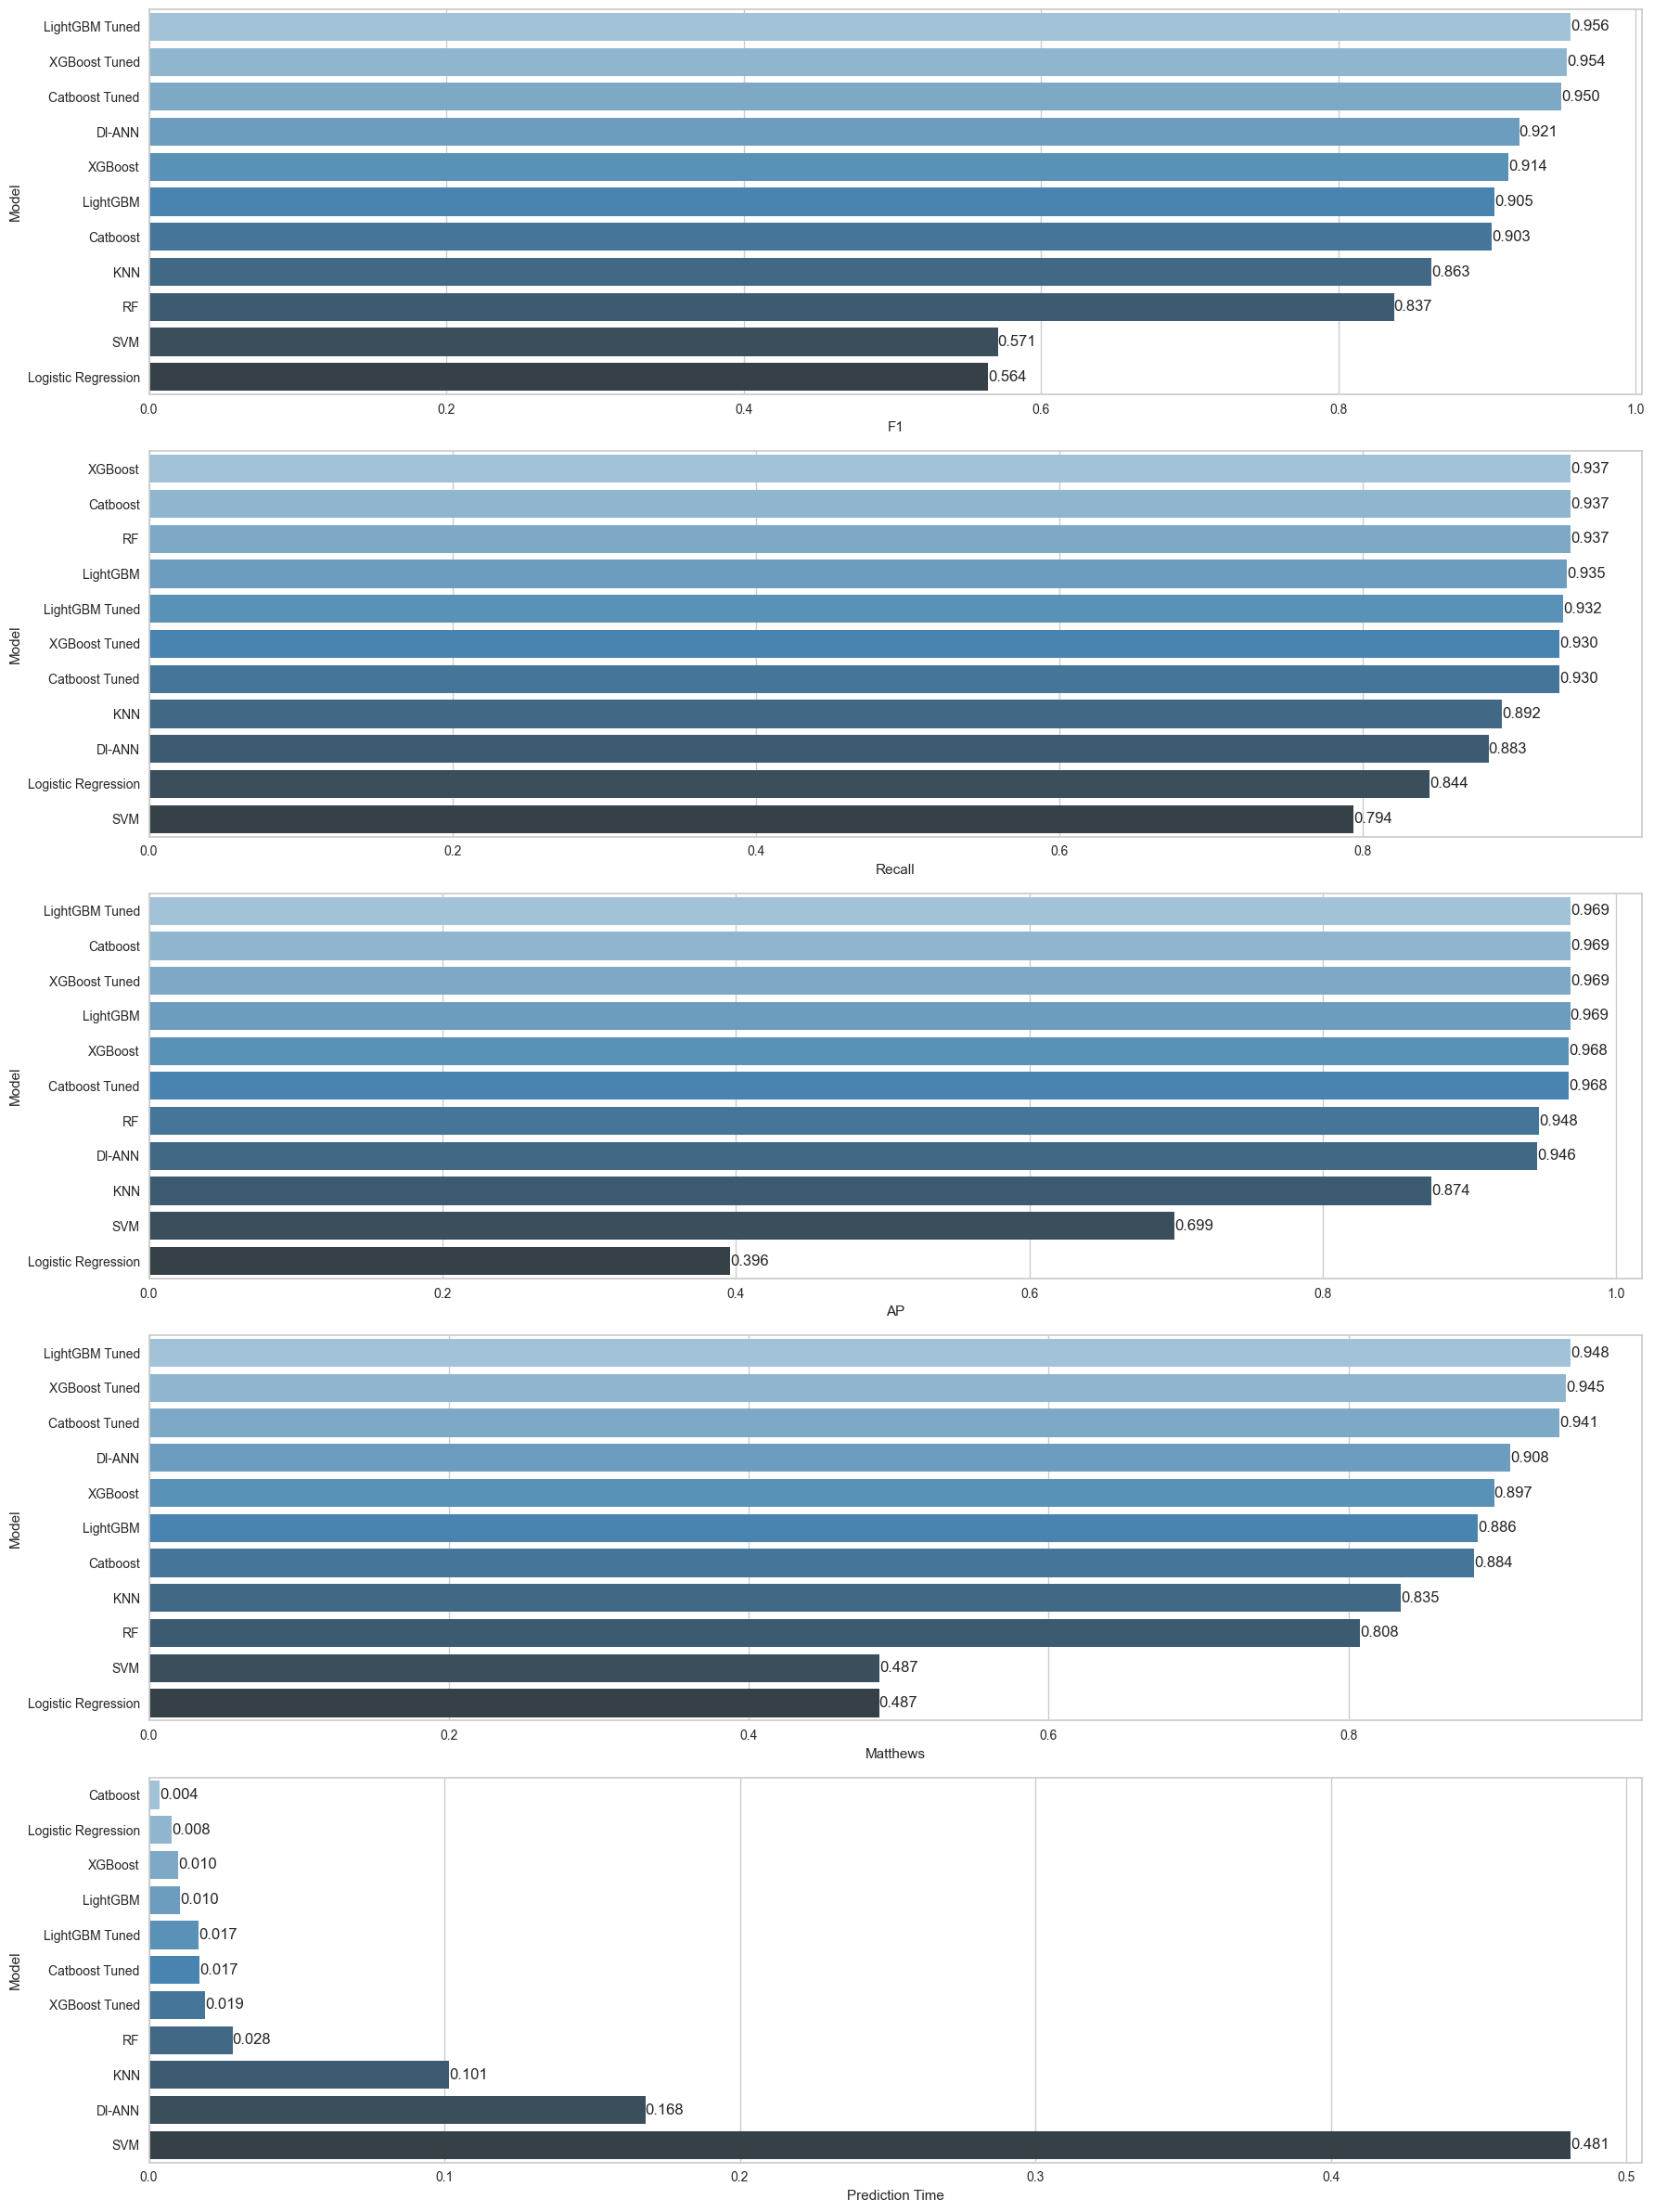

In [211]:
compare = pd.DataFrame({"Model": ["Logistic Regression", 'KNN','SVM','RF', 'Catboost', 'Catboost Tuned', "XGBoost", 'XGBoost Tuned', 'LightGBM', 'LightGBM Tuned', 'Dl-ANN'],
                        "F1": [log_f1, knn_f1, SVM_f1, rf_f1, cat_f1, cata_f1, xgb_f1, xgba_f1, lgbm_f1, lgbma_f1, optuna_f1],
                        "Recall": [log_rec, knn_rec, SVM_rec, rf_rec, cat_rec, cata_rec, xgb_rec, xgba_rec, lgbm_rec, lgbma_rec, optuna_rec],
                        "AP": [log_AP, knn_AP,SVM_AP, rf_AP, cat_AP, cata_AP, xgb_AP, xgba_AP, lgbm_AP, lgbma_AP, optuna_AP],
                        "Matthews": [log_matthews, knn_matthews, SVM_matthews, rf_matthews, cat_matthews, cata_matthews, xgb_matthews, xgba_matthews, lgbm_matthews, lgbma_matthews, optuna_matthews],
                        "Prediction Time": [log_time, knn_time, SVM_time, rf_time, cat_time, cata_time, xgb_time, xgba_time, lgbm_time, lgbma_time, optuna_time]})

    
plt.figure(figsize=(18,24))
plt.subplot(5,1,1)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,2)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,3)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,4)
compare = compare.sort_values(by="Matthews", ascending=False)
ax=sns.barplot(x="Matthews", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,5)
compare = compare.sort_values(by="Prediction Time", ascending=True)
ax=sns.barplot(x="Prediction Time", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")



plt.tight_layout()
plt.show();

MODEL CHOICE: Catboost Tuned

Tree-based models, including Catboost, LightGBM, and XGBoost (both tuned and untuned), outperform other algorithms, exhibiting similar scores. Among these three models, despite a slightly lower recall score, the tuned version of Catboost demonstrates the highest performance when considering metrics such as precision, F1, or Matthews Correlation Coefficient. The selection of the best model or the choice of the target metric (recall or precision) should be made after discussing the specifics with the client. For this project, we will utilize the tuned Catboost as the final model for deployment and present it to the public via Streamlit.

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

In [212]:
X = df.drop('left', axis=1)
y = df['left'].values

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [214]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()


# Create a CatBoostClassifier model with best hyperparameters
cat_model = CatBoostClassifier(random_state = 42, verbose=500, cat_features = cat_features, 
                               use_best_model=True,early_stopping_rounds= 10, learning_rate= 0.11960541782042483, 
                               n_estimators= 128)

# Fit the model on the training data
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.6026205	test: 0.6012944	best: 0.6012944 (0)	total: 32ms	remaining: 4.07s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.07403529847
bestIteration = 108

Shrink model to first 109 iterations.


### Save and Export the Best Model

In [216]:
import pickle

In [217]:
pickle.dump(cat_model, open('emp_churn_final_model', 'wb'))

In [218]:
loaded_model = pickle.load(open('emp_churn_final_model', 'rb'))

In [219]:
df_sample = pd.DataFrame(X_test.iloc[0]).T
df_sample

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
416,0.11,0.9,6,264,4,0,0,Technical,medium


In [221]:
loaded_model.predict(df_sample)

array([1], dtype=int64)

In [222]:
# check it with the real value
df.left.loc[416]

1